###**Biblioteki**

In [1]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go
import math
import pylab
import warnings

from pandas.plotting import scatter_matrix
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet,
    LassoCV, ElasticNetCV, RidgeCV
)
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (
    RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
)
from sklearn.feature_selection import RFECV

from tensorflow import keras
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignore warnings
warnings.filterwarnings('ignore')



In [3]:
!pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

###**Dane**

**Informacje o danych:**

1. **age** - wiek,
2. **sex** - płeć,
3. **cp** - rodzaj bólu w klatce piersiowej (typowa dławica piersiowa, atypowa dławica piersiowa, ból niedławicowy, brak),
4. **trestbps** - spoczynkowe ciśnienie skurczowe,
5. **chol** - cholesterol mg/dl,
6. **fbs** - poziom cukru we krwi na czczo > 120 mg/dl (1), < 120 mg/dl(0),
7. **restecg** - wyniki EKG spoczynkowego,
8. **thalach** - maksymalne tętno,
9. **exang** - dławica piersiowa podczas wysiłku,
10. **oldpeak** - obniżenie odcinka ST podczas wysiłku,
11. **slope** - nachylenie szczytowego odcinka ST podczas wysiłku,
12. **ca** - naczynia uwidocznione podczas prześwietlenia,
13. **thal** - 0 = normalny, 1 = naprawiona wada, 2 = wada odwracalna.
14. **class** -  0 - zdrowy, 1 - chory.



In [4]:
# wczytanie danych jeśli format .csv
data = pd.read_csv('dane_3.csv')
#informacja jakie pole są w tabeli
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acousticness        3614 non-null   float64
 1   danceability        3614 non-null   float64
 2   duration_ms         3614 non-null   float64
 3   energy              3614 non-null   float64
 4   instrumentalness    3614 non-null   float64
 5   liveness            3614 non-null   float64
 6   loudness            3614 non-null   float64
 7   speechiness         3614 non-null   float64
 8   tempo               3614 non-null   float64
 9   valence             3614 non-null   float64
 10  popularity          3614 non-null   float64
 11  key                 3614 non-null   int64  
 12  mode                3614 non-null   int64  
 13  streaming_platform  3614 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 395.4+ KB


**Komentarz:**

Dane są kompletne i nie ma brakujacych wartości.

**wytyczne**

Należy ograniczyć dane do 2000 elementów. Aktualnie jest 3614

In [5]:
data.head()

acousticness  danceability    duration_ms    energy  instrumentalness  \
0      0.251266      0.491589  202686.386243  0.735014          0.021607   
1      0.184074      0.595094  200241.498148  0.748717          0.000029   
2      0.137922      0.467667  241247.555556  0.641889          0.032414   
3      0.095935      0.693500  167717.500000  0.782000          0.000012   
4      0.918000      0.389000  241933.000000  0.447000          0.904000   

   liveness   loudness  speechiness       tempo   valence  popularity  key  \
0  0.220297  -5.913217     0.059281  119.755273  0.449164   48.546737    7   
1  0.222492  -6.196219     0.048718  110.246598  0.611644   54.556481   11   
2  0.110778  -8.370444     0.039644  163.291667  0.270233   26.222222    2   
3  0.155950  -7.007500     0.113950  125.498000  0.621500   56.500000    6   
4  0.087800 -18.247000     0.043900  130.270000  0.197000    0.000000    2   

   mode streaming_platform  
0     1            Spotify  
1     1            Spotify  
2     1        Apple Music  
3     0            Spotify  
4     1            Spotify

In [6]:
# Usunięcie kolumn, które nia mają wartości liczbowych
data.drop(columns = ['streaming_platform'], inplace = True)
data.head()

acousticness  danceability    duration_ms    energy  instrumentalness  \
0      0.251266      0.491589  202686.386243  0.735014          0.021607   
1      0.184074      0.595094  200241.498148  0.748717          0.000029   
2      0.137922      0.467667  241247.555556  0.641889          0.032414   
3      0.095935      0.693500  167717.500000  0.782000          0.000012   
4      0.918000      0.389000  241933.000000  0.447000          0.904000   

   liveness   loudness  speechiness       tempo   valence  popularity  key  \
0  0.220297  -5.913217     0.059281  119.755273  0.449164   48.546737    7   
1  0.222492  -6.196219     0.048718  110.246598  0.611644   54.556481   11   
2  0.110778  -8.370444     0.039644  163.291667  0.270233   26.222222    2   
3  0.155950  -7.007500     0.113950  125.498000  0.621500   56.500000    6   
4  0.087800 -18.247000     0.043900  130.270000  0.197000    0.000000    2   

   mode  
0     1  
1     1  
2     1  
3     0  
4     1

###**Zduplikowane wiersze**

In [7]:
# data.duplicated() zwraca serię, gdzie: True - duplikat, False - wartość unikalna
duplikaty = data.duplicated()
# indeksy zduplikowanych wierszy
indeksy_wierszy = duplikaty[duplikaty].index.values
indeksy_wierszy


array([ 360,  409,  737,  870,  912, 1025, 1079, 1224, 1334, 1335, 1354,
       1436, 1504, 1514, 1541, 1555, 1716, 1775, 1821, 1849, 1868, 1932,
       1944, 1975, 1976, 1990, 2004, 2020, 2061, 2162, 2317, 2349, 2362,
       2411, 2430, 2460, 2502, 2506, 2518, 2526, 2543, 2570, 2579, 2595,
       2597, 2651, 2684, 2722, 2743, 2748, 2774, 2785, 2786, 2814, 2884,
       2890, 2910, 2940, 2963, 2984, 3060, 3129, 3133, 3137, 3150, 3191,
       3242, 3256, 3257, 3264, 3358, 3362, 3366, 3382, 3441, 3443, 3476,
       3496, 3512, 3535, 3545, 3565, 3597])

In [8]:
dane = data.drop_duplicates()
dane.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3531 entries, 0 to 3613
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      3531 non-null   float64
 1   danceability      3531 non-null   float64
 2   duration_ms       3531 non-null   float64
 3   energy            3531 non-null   float64
 4   instrumentalness  3531 non-null   float64
 5   liveness          3531 non-null   float64
 6   loudness          3531 non-null   float64
 7   speechiness       3531 non-null   float64
 8   tempo             3531 non-null   float64
 9   valence           3531 non-null   float64
 10  popularity        3531 non-null   float64
 11  key               3531 non-null   int64  
 12  mode              3531 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 386.2 KB


**Komentarz:**

Usunięto zduplikowane wartości - ograniczono zbiór do 3531 wartosci.

In [98]:
# podstawowe informacje o danych
data.describe()

acousticness  danceability   duration_ms       energy  \
count   3614.000000   3614.000000  3.614000e+03  3614.000000   
mean       0.355806      0.580580  2.378656e+05     0.583236   
std        0.303728      0.161766  8.299597e+04     0.213976   
min        0.000003      0.059851  3.094600e+04     0.002825   
25%        0.092474      0.478000  1.960636e+05     0.448928   
50%        0.263570      0.587834  2.267444e+05     0.616216   
75%        0.589000      0.698772  2.618300e+05     0.739000   
max        0.996000      0.975000  1.644773e+06     0.999500   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       3614.000000  3614.000000  3614.000000  3614.000000  3614.000000   
mean           0.150736     0.187241    -9.260491     0.094763   120.228898   
std            0.238836     0.097978     4.845754     0.090899    21.718597   
min            0.000000     0.022200   -37.613463     0.022502    37.764836   
25%            0.000009     0.121448   -11.126421     0.045400   107.012250   
50%            0.017906     0.170651    -7.996500     0.063068   119.221886   
75%            0.205328     0.217743    -5.998091     0.103002   129.951210   
max            0.992000     0.927000    -0.131500     0.940935   220.099000   

           valence   popularity          key         mode  
count  3614.000000  3614.000000  3614.000000  3614.000000  
mean      0.493978    50.546272     5.753182     0.774211  
std       0.202861    22.331811     3.480038     0.418158  
min       0.004886     0.000000     0.000000     0.000000  
25%       0.347455    37.000000     2.000000     1.000000  
50%       0.499412    48.348485     7.000000     1.000000  
75%       0.638937    75.000000     9.000000     1.000000  
max       0.980000    91.000000    11.000000     1.000000

**Komentarz:** Jak widac dane sa mocno rozbierzne i  należy je ustandaryzować.

In [10]:
# Standaryzacja danych
scaler = MinMaxScaler()
dane_scal = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
# dane_scal = pd.DataFrame(data, columns = data.columns)
dane_scal.head()

acousticness  danceability  duration_ms    energy  instrumentalness  \
0      0.252272      0.471768     0.106418  0.734632          0.021781   
1      0.184811      0.584869     0.104903  0.748380          0.000029   
2      0.138473      0.445627     0.130312  0.641196          0.032676   
3      0.096317      0.692400     0.084750  0.781774          0.000012   
4      0.921686      0.359667     0.130737  0.445657          0.911290   

   liveness  loudness  speechiness     tempo   valence  popularity       key  \
0  0.218940  0.845747     0.040046  0.449671  0.455617    0.533481  0.636364   
1  0.221366  0.838196     0.028545  0.397522  0.622244    0.599522  1.000000   
2  0.097898  0.780189     0.018665  0.688444  0.272119    0.288156  0.181818   
3  0.147823  0.816552     0.099570  0.481167  0.632351    0.620879  0.545455   
4  0.072502  0.516688     0.023299  0.507339  0.197017    0.000000  0.181818   

   mode  
0   1.0  
1   1.0  
2   1.0  
3   0.0  
4   1.0

**Komentarz:**

Przeprowadzono standaryzację danych aby wartości zawierały się w przedziale 0-1

In [11]:
# dodatkowo usuwamy kolumny które nie wnoszą nic do naszych rozważań
dane_scal.drop(columns = ['key', 'mode'], inplace = True)

### **Podział danych**

In [12]:
# Podział danych
X = dane_scal.copy()
X.drop(columns = ['popularity'], inplace = True)
Y = dane_scal['popularity']

**Komentarz:** Podzielono dane na X i Y w celu sformalizowania struktury problemu. Będziemy sprawdzać jakie cechy utworów muzycznych mają wpływ na popularnośc danego utworu. Pozwoli to nam się dowiedziec jakie cechy utworu decydują o tym czy odniesie on sukces.

### **Wizualizacja danych**

18


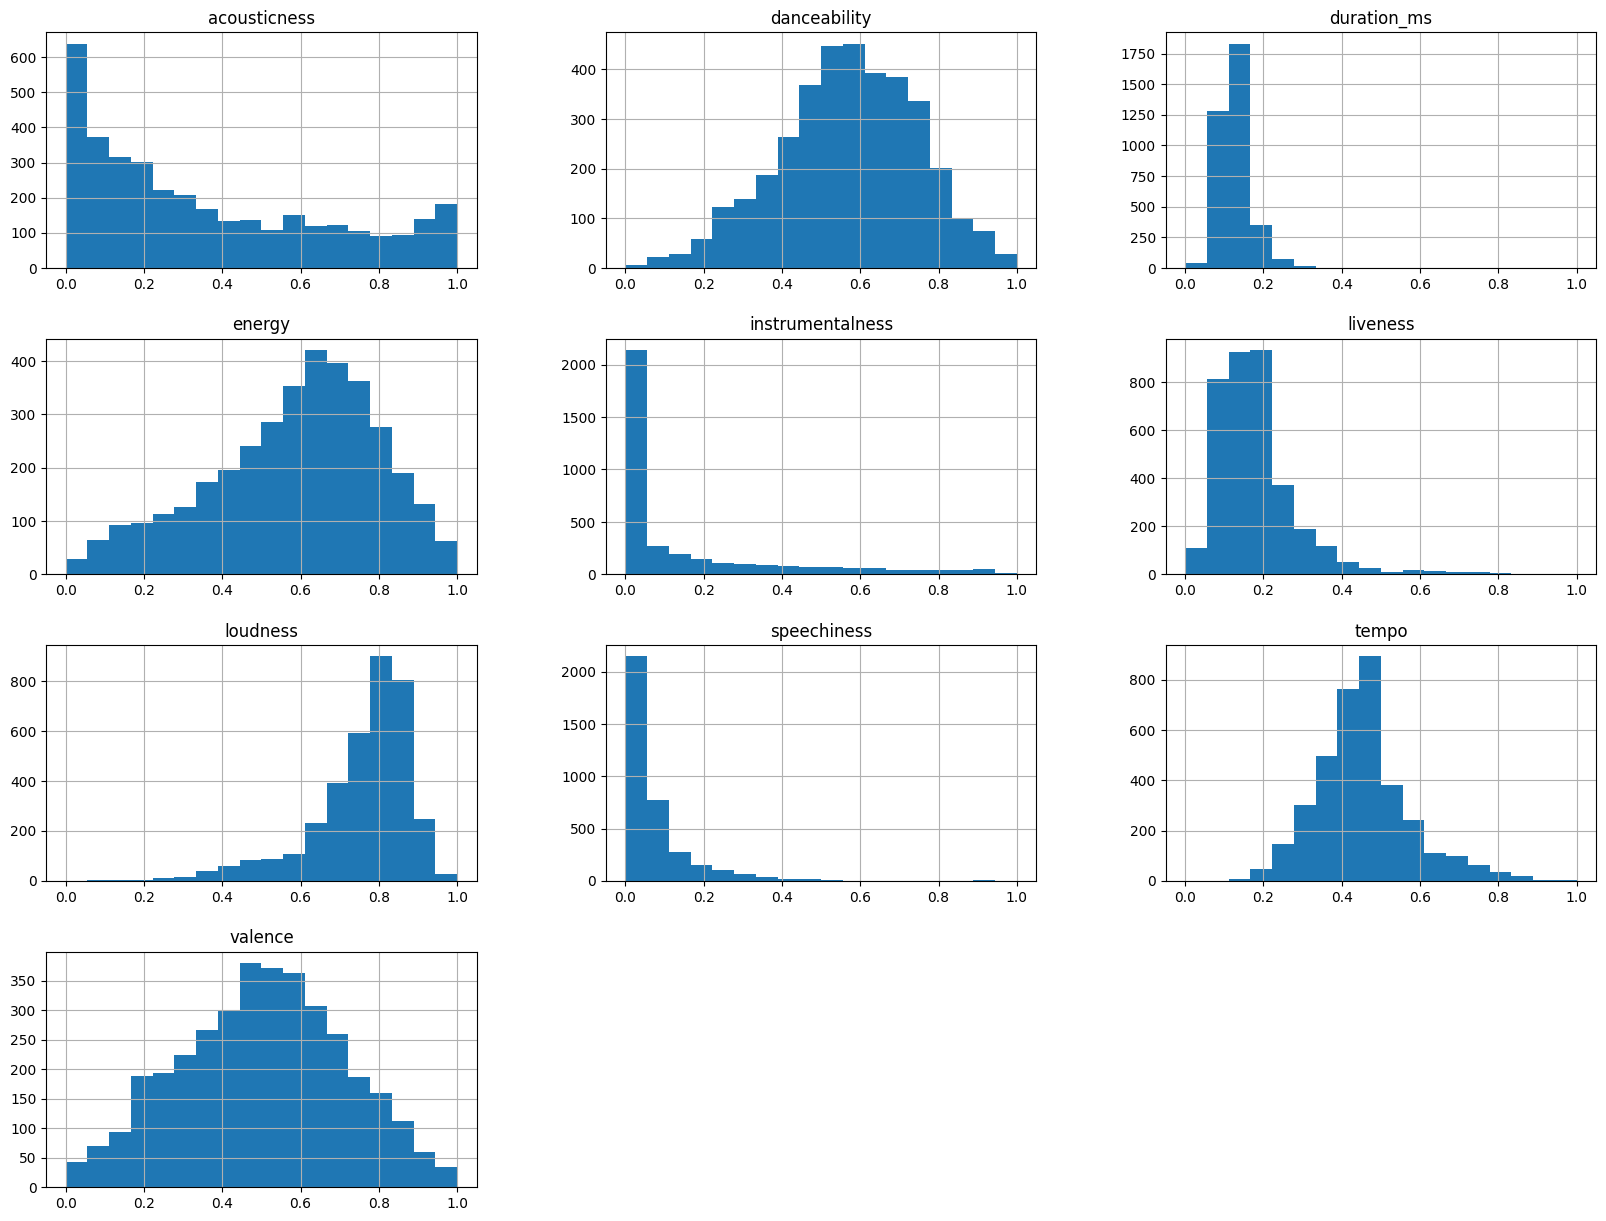

In [13]:
k1 = round(5*math.log10(X.shape[0]))
print(k1)

X.hist(bins = k1, figsize=(20,15))
plt.show()

**Komentarz:** Powyżej widzimy wizualizacje rozkładów wartości w poszczególnych klasach.

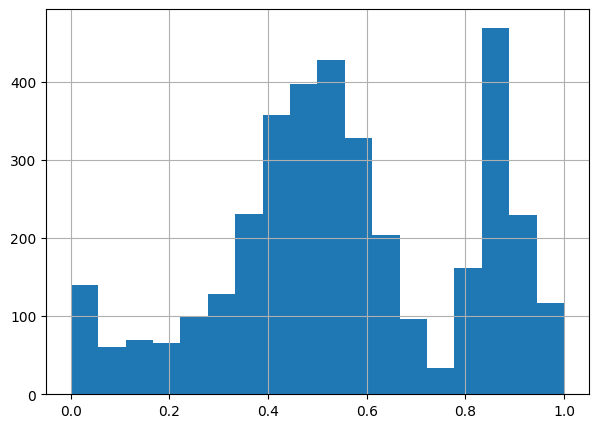

In [ ]:
# popularity
Y.hist(bins = k1, figsize=(7,5))
plt.show()

<Axes: >

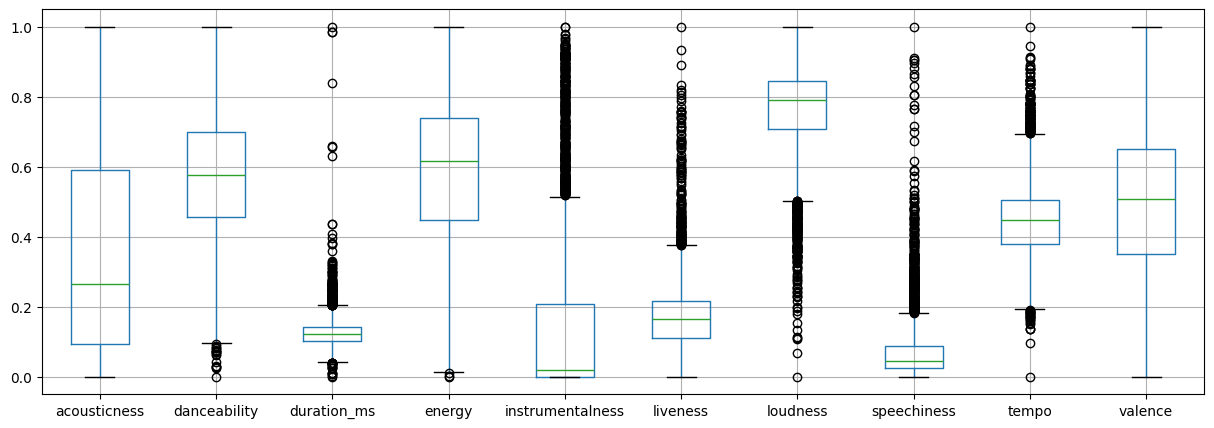

In [ ]:
X.boxplot(figsize =(15,5))

**Komentarz**

Na podstawie powyższych boxplotów widzimy, że należy zawęzić obszar użytecznych danych

In [68]:
# Usuwanie wartości równych 0
# dane_scal = dane_scal.replace(0, np.nan)
# dane_scal = dane_scal.dropna()

# Usunięcie wartości odstających

dane_scal_2 = dane_scal.copy()

dane_scal_2 = dane_scal_2[dane_scal_2['danceability'] > 0.12]
dane_scal_2 = dane_scal_2[dane_scal_2['duration_ms'] > 0.1]
dane_scal_2 = dane_scal_2[dane_scal_2['duration_ms'] < 0.35]
dane_scal_2 = dane_scal_2[dane_scal_2['energy'] > 0.1]
dane_scal_2 = dane_scal_2[dane_scal_2['loudness'] > 0.2]
dane_scal_2 = dane_scal_2[dane_scal_2['liveness'] < 0.8]
dane_scal_2 = dane_scal_2[dane_scal_2['instrumentalness'] < 0.99]
dane_scal_2 = dane_scal_2[dane_scal_2['speechiness'] < 0.55]
dane_scal_2 = dane_scal_2[dane_scal_2['tempo'] > 0.15]
dane_scal_2 = dane_scal_2[dane_scal_2['tempo'] < 0.88]


# Zresetowanie indeksów
dane_scal_2.reset_index(drop=True, inplace=True)

<Axes: >

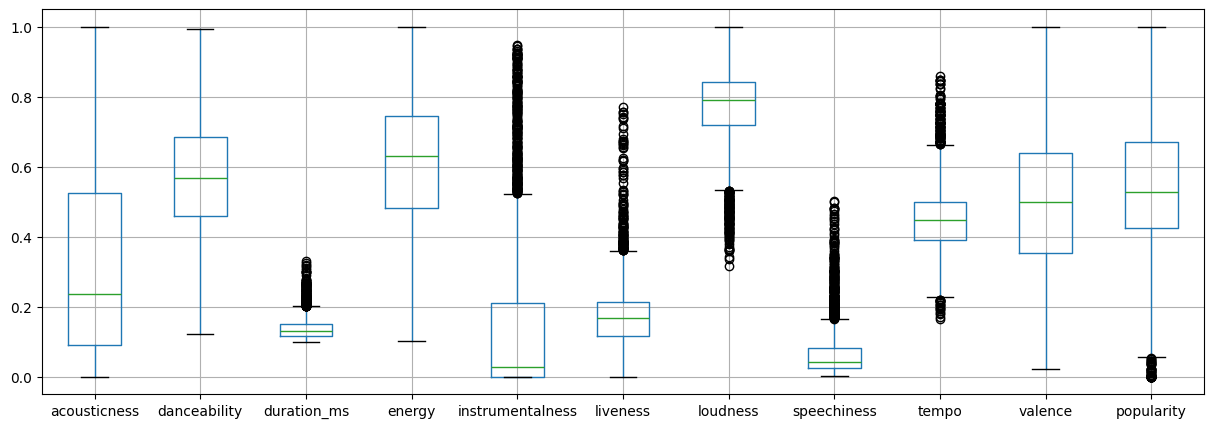

In [69]:
dane_scal_2.boxplot(figsize =(15,5))

In [70]:
# sprawdzenie liczebnosci
dane_scal_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696 entries, 0 to 2695
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2696 non-null   float64
 1   danceability      2696 non-null   float64
 2   duration_ms       2696 non-null   float64
 3   energy            2696 non-null   float64
 4   instrumentalness  2696 non-null   float64
 5   liveness          2696 non-null   float64
 6   loudness          2696 non-null   float64
 7   speechiness       2696 non-null   float64
 8   tempo             2696 non-null   float64
 9   valence           2696 non-null   float64
 10  popularity        2696 non-null   float64
dtypes: float64(11)
memory usage: 231.8 KB


**Komentarz:**

Usunięto dane odstające. Powyżej są widoczne "wyczyszczone" dane, jest ich 2696. Postanowiłem nie usuwać wszystkich odstających próbek w miejscach gdzie jest ich dużo aby nie ograniczyć zbytno zioru.

In [71]:
# Podział nowych danych
X = dane_scal_2.copy()
X.drop(columns = ['popularity'], inplace = True)
Y = dane_scal_2['popularity']

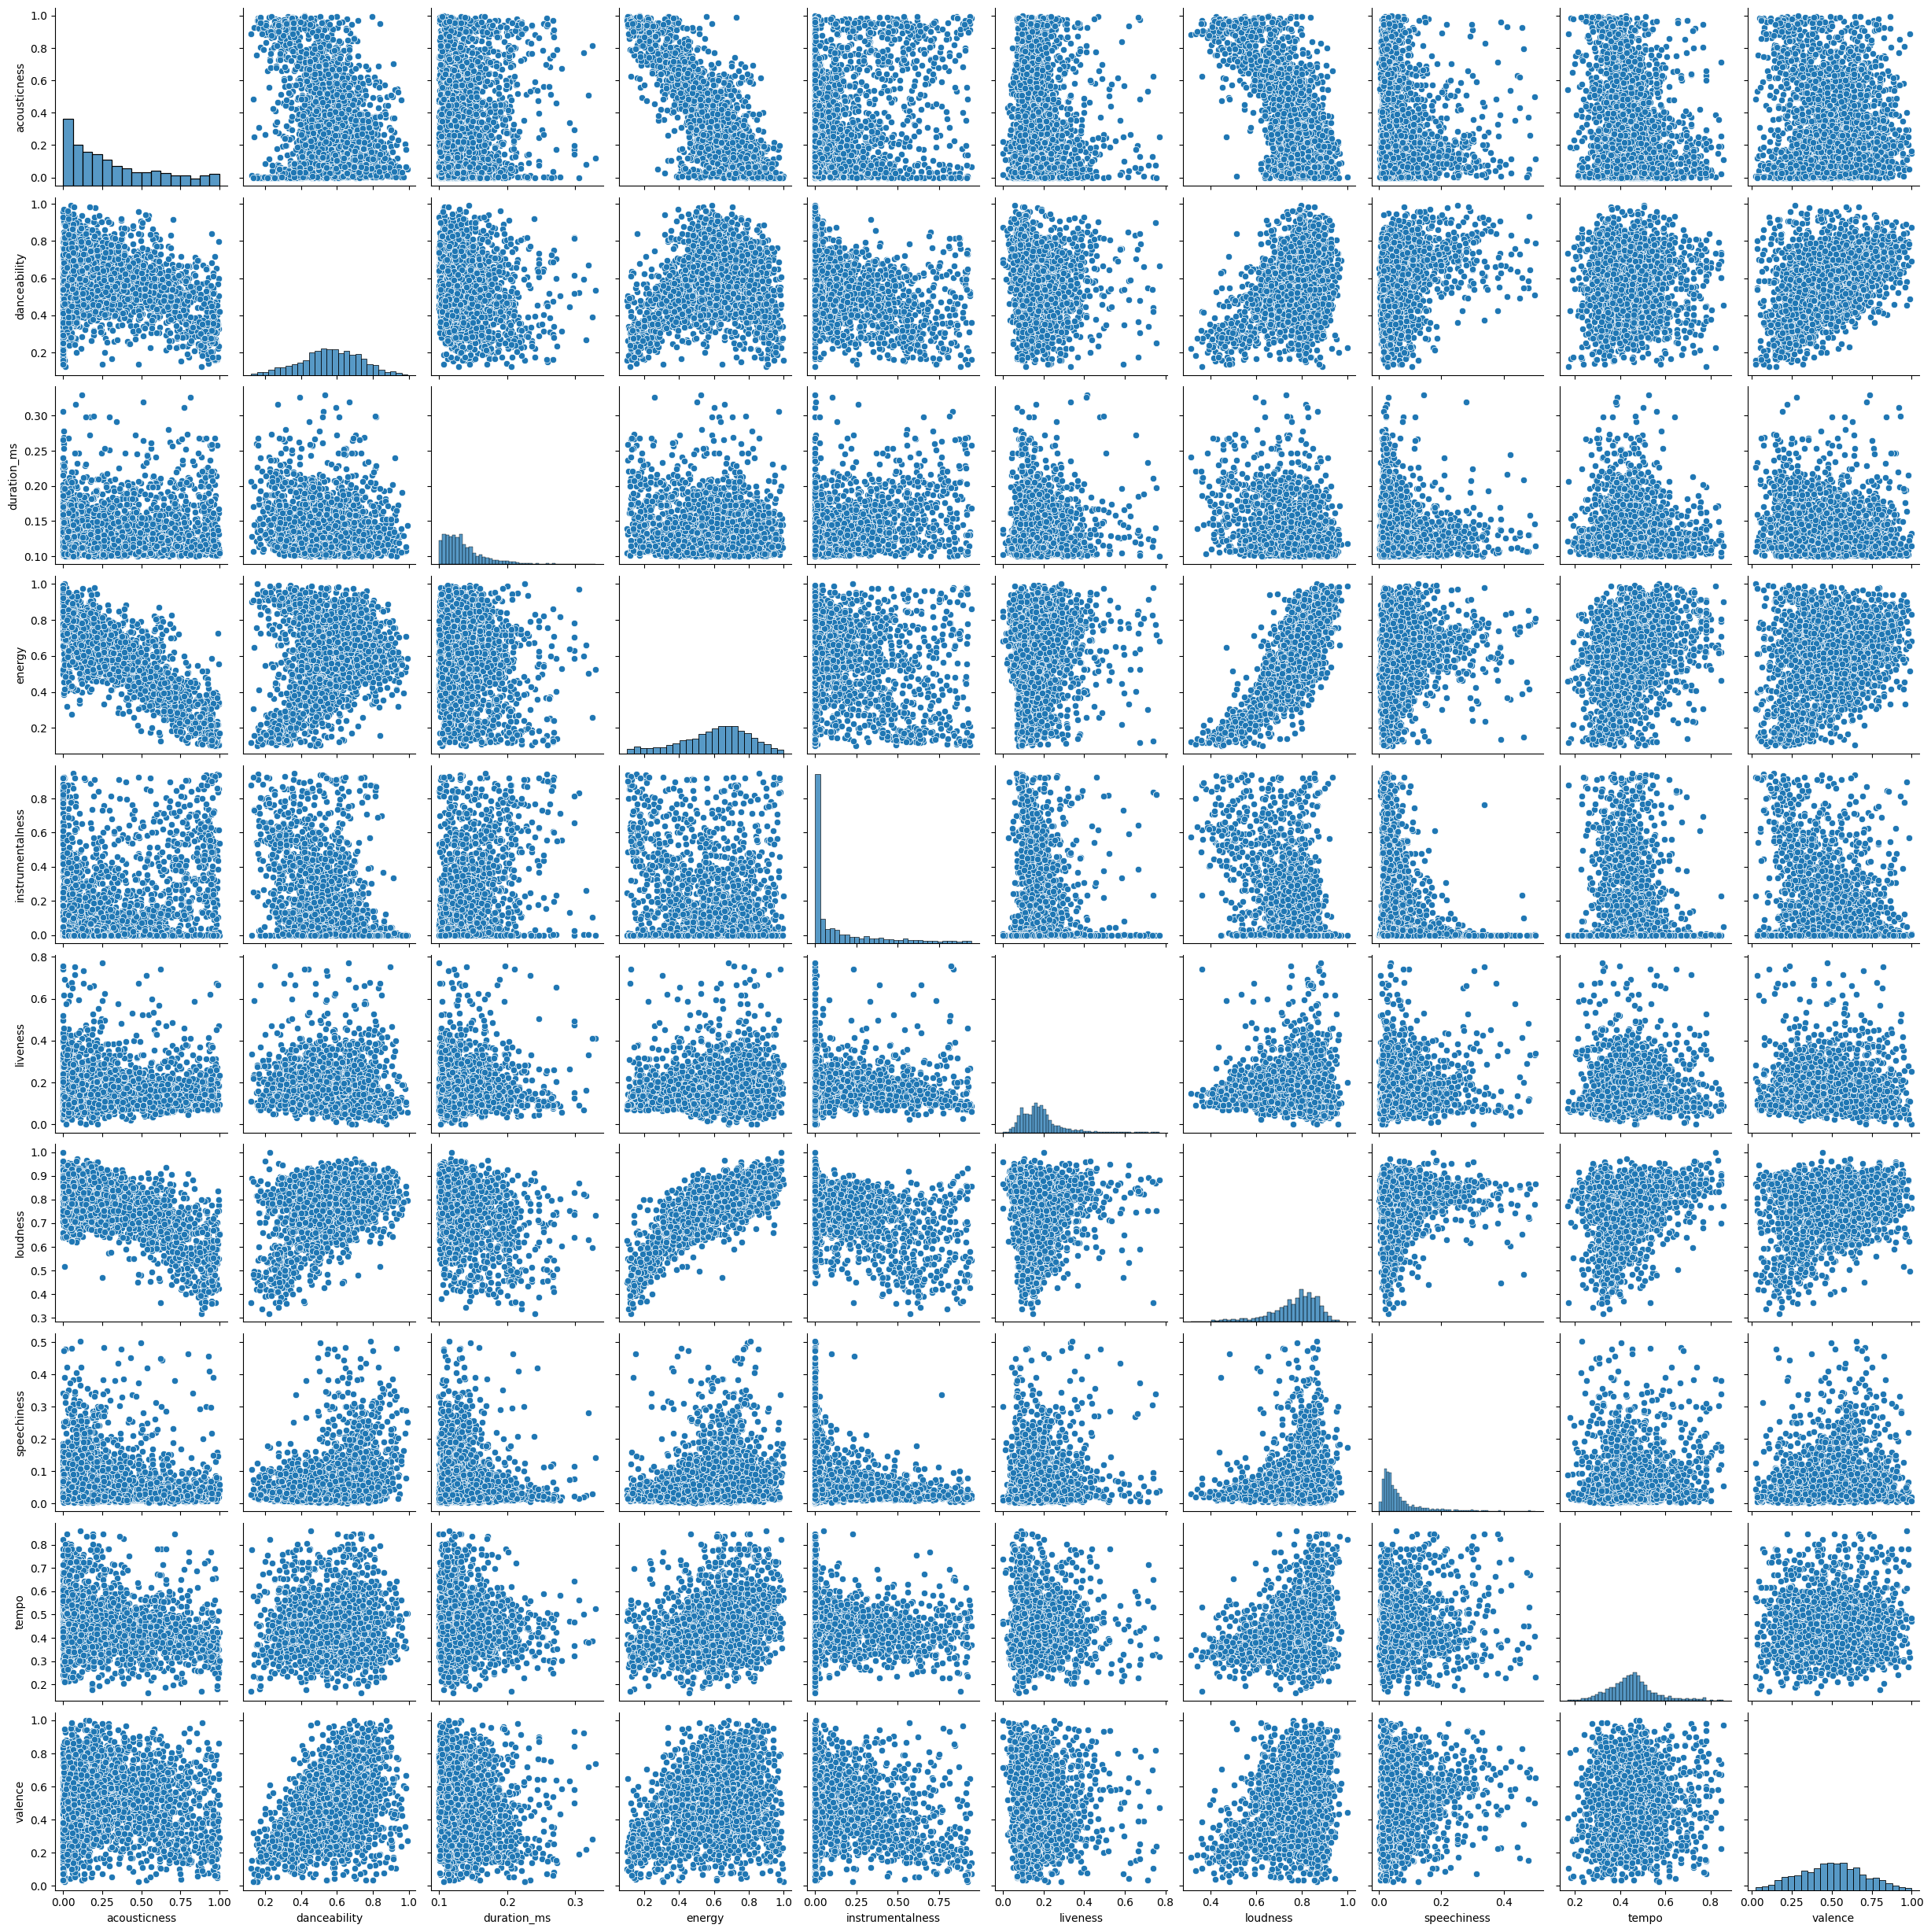

In [ ]:
sns.pairplot(X)

**Wnioski**

Na podstawie wykresów zauwazono korelację między **energy** i **loudness**.
Natomiast zauważono, że **loudness** ma także lekki wpływ korelacji na inne parametry, dlatego usuniemy jego.

In [72]:
# usunięcie wysoko skorelowanych cech - usuniecie loudness
X.drop(columns = ['loudness'], inplace = True)

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696 entries, 0 to 2695
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2696 non-null   float64
 1   danceability      2696 non-null   float64
 2   duration_ms       2696 non-null   float64
 3   energy            2696 non-null   float64
 4   instrumentalness  2696 non-null   float64
 5   liveness          2696 non-null   float64
 6   speechiness       2696 non-null   float64
 7   tempo             2696 non-null   float64
 8   valence           2696 non-null   float64
dtypes: float64(9)
memory usage: 189.7 KB


**Finalna standaryzacja po odfilrtowaniu wartosci odstających:**

Dane po ponownej standaryzacji (na danych bez wartości odstających):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696 entries, 0 to 2695
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2696 non-null   float64
 1   danceability      2696 non-null   float64
 2   duration_ms       2696 non-null   float64
 3   energy            2696 non-null   float64
 4   instrumentalness  2696 non-null   float64
 5   liveness          2696 non-null   float64
 6   speechiness       2696 non-null   float64
 7   tempo             2696 non-null   float64
 8   valence           2696 non-null   float64
 9   popularity        2696 non-null   float64
dtypes: float64(10)
memory usage: 210.8 KB
None


<Axes: >

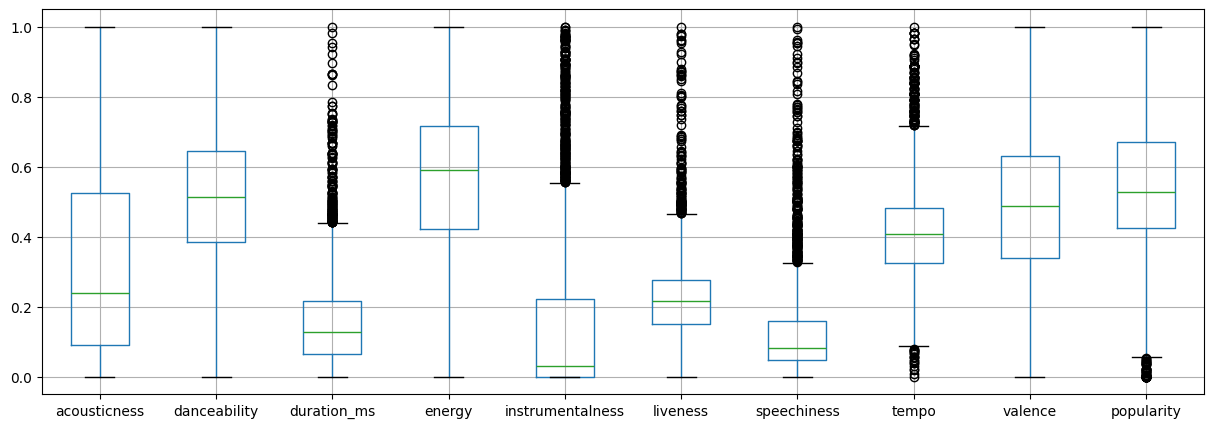

In [74]:
dane_scal_2.drop(columns = ['loudness'], inplace = True)
scaler_after_outliers = MinMaxScaler()
dane_scal_3 = pd.DataFrame(scaler_after_outliers.fit_transform(dane_scal_2), columns=dane_scal_2.columns)

print("Dane po ponownej standaryzacji (na danych bez wartości odstających):")
print(dane_scal_3.info())

# wizualizacja
dane_scal_3.boxplot(figsize =(15,5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507 entries, 0 to 2506
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2507 non-null   float64
 1   danceability      2507 non-null   float64
 2   duration_ms       2507 non-null   float64
 3   energy            2507 non-null   float64
 4   instrumentalness  2507 non-null   float64
 5   liveness          2507 non-null   float64
 6   speechiness       2507 non-null   float64
 7   tempo             2507 non-null   float64
 8   valence           2507 non-null   float64
 9   popularity        2507 non-null   float64
dtypes: float64(10)
memory usage: 196.0 KB


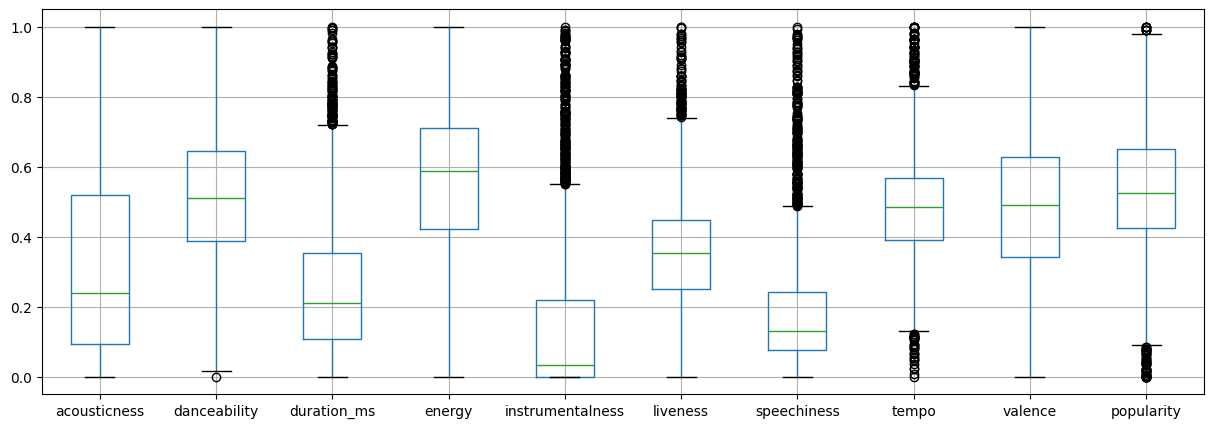

In [90]:
# Usunięcie wartości odstających

dane_scal_4 = dane_scal_3.copy()

dane_scal_4 = dane_scal_4[dane_scal_4['duration_ms'] < 0.6]
dane_scal_4 = dane_scal_4[dane_scal_4['speechiness'] < 0.62]
dane_scal_4 = dane_scal_4[dane_scal_4['liveness'] < 0.63]
dane_scal_4 = dane_scal_4[dane_scal_4['tempo'] < 0.84]

scaler_final = MinMaxScaler()
dane_scal_4 = pd.DataFrame(scaler_final.fit_transform(dane_scal_4), columns=dane_scal_4.columns)

# Zresetowanie indeksów
dane_scal_4.reset_index(drop=True, inplace=True)

# wizualizacja
dane_scal_4.boxplot(figsize =(15,5))
dane_scal_4.info()

In [82]:
# Podział nowych danych
X = dane_scal_4.copy()
X.drop(columns = ['popularity'], inplace = True)
Y = dane_scal_4['popularity']

###**1. Analiza regresji**
zadanie na ocenę 5

In [83]:
# Podział na zbiór testowy i treningowy
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [84]:
# Definicja modelu sekwencyjnego
model = Sequential()

# Dodanie warstwy wejściowej i ukrytej
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# Dodanie kolejnej warstwy ukrytej
model.add(Dense(32, activation='relu'))

# Dodanie warstwy wyjściowej
# W regresji, warstwa wyjściowa ma 1 neuron i brak funkcji aktywacji lub liniową
model.add(Dense(1))

# Kompilacja modelu
# Optymalizator: Adam
# Funkcja straty (loss function): mean_squared_error (MSE)
# Metryki (metrics): mean_absolute_error (MAE)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Wyświetlenie podsumowania modelu
model.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_147 (Dense)               │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

**Trenowanie modelu**

In [ ]:
# epochs: Liczba epok (przejść przez cały zbiór treningowy)
# batch_size: Liczba próbek w każdej partii danych używanej do aktualizacji wag modelu
# validation_split: Proporcja danych treningowych używana jako zbiór walidacyjny
# callbacks: Lista funkcji zwrotnych
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[History()])

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1620 - mean_absolute_error: 0.3216 - val_loss: 0.0363 - val_mean_absolute_error: 0.1461
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0339 - mean_absolute_error: 0.1450 - val_loss: 0.0285 - val_mean_absolute_error: 0.1304
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0261 - mean_absolute_error: 0.1280 - val_loss: 0.0251 - val_mean_absolute_error: 0.1217
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.1179 - val_loss: 0.0247 - val_mean_absolute_error: 0.1230
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 - mean_absolute_error: 0.1178 - val_loss: 0.0227 - val_mean_absolute_error: 0.1131
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.1096 - val_loss: 0.0222 - val_mean_absolute_error: 0.1135
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - mean_absolute_error: 0.1073 - val_loss

**Ocena Modelu na Danych Testowych**

In [ ]:
# Ocena modelu na danych testowych
loss, mae = model.evaluate(X_test, y_test, verbose=0)

print(f'Mean Squared Error on test data: {loss:.4f}')
print(f'Mean Absolute Error on test data: {mae:.4f}')

Mean Squared Error on test data: 0.0181
Mean Absolute Error on test data: 0.0959


**Komentarz:**

Wartość MSE jest stosunkowo niska, czyli średni błąd kwadratowy jest niewielki - wynik pozytywny

MAE czyli średnia wartość bezwzględna różnic między przewidywanymi wartosciami jes dopuszczalny.

**Wnioski:**
Na podstawie tych wyników, wydaje się, że model regresji oparty na sztucznej sieci neuronowej osiągnął dobrą wydajność na danych testowych.
Niskie wartości zarówno **MSE (0.0182)**, jak i **MAE (0.0942)** sugerują, że model dokonuje dokładnych przewidywań popularności utworów muzycznych na podstawie wybranych cech.

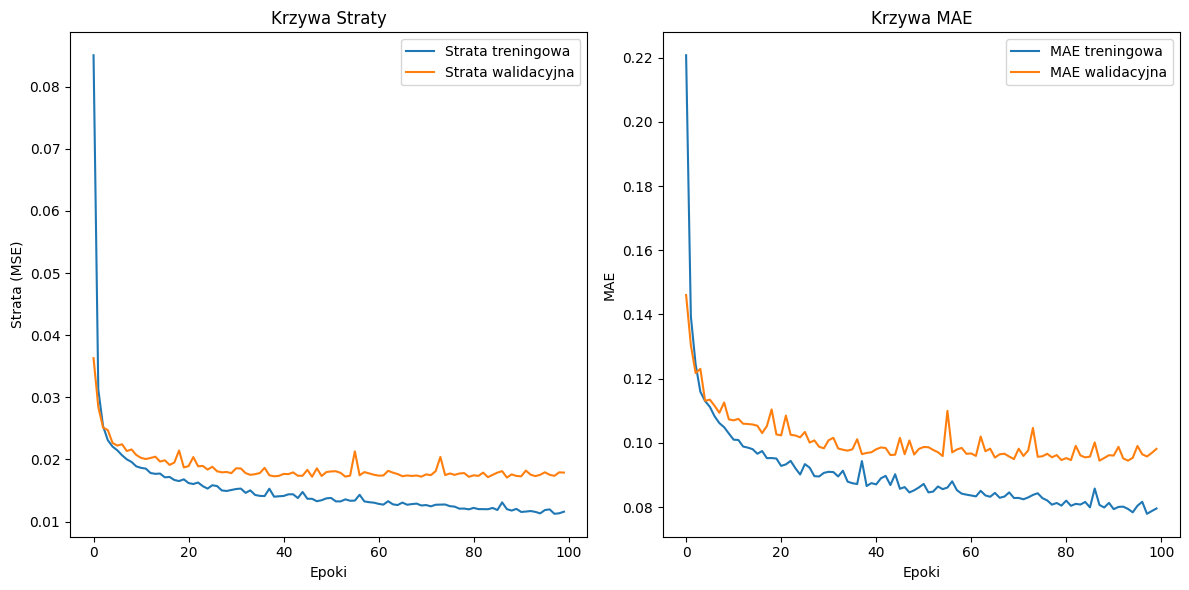

In [ ]:
# Wykres krzywych uczenia
plt.figure(figsize=(12, 6))

# Krzywa straty
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.title('Krzywa Straty')
plt.xlabel('Epoki')
plt.ylabel('Strata (MSE)')
plt.legend()

# Krzywa metryki (MAE w tym przypadku)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='MAE treningowa')
plt.plot(history.history['val_mean_absolute_error'], label='MAE walidacyjna')
plt.title('Krzywa MAE')
plt.xlabel('Epoki')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

**Komentarz:**
- model uczy sie poprawnie
- brak silnego przeuczenia na końcu
- model osiąga niską stratę

**Model można jeszcze uczyć**

**Dobór hiperparametrów**

In [ ]:
# Definiowanie przestrzeni hiperparametrów do przeszukania
param_grid = {
    'num_neurons_layer1': [64, 128, 256], # Liczba neuronów w pierwszej warstwie ukrytej
    'num_neurons_layer2': [32, 64, 128, None], # Liczba neuronów w drugiej warstwie ukrytej (None oznacza brak drugiej warstwy)
    'num_neurons_layer3': [16, 32, None], # Dodana: Liczba neuronów w trzeciej warstwie ukrytej (None oznacza brak trzeciej warstwy)
    'learning_rate': [0.001, 0.0005], # Szybkość uczenia optymalizatora Adam
    'epochs': [100], # Liczba epok
    'batch_size': [32] # Rozmiar partii
}

best_mae = float('inf')
best_params = None
results = [] # Do przechowywania wyników dla każdej kombinacji

# Iterowanie przez kombinacje hiperparametrów
for num_neurons1 in param_grid['num_neurons_layer1']:
    for num_neurons2 in param_grid['num_neurons_layer2']:
        for num_neurons3 in param_grid['num_neurons_layer3']: # Dodana pętla dla trzeciej warstwy
            for lr in param_grid['learning_rate']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:

                        # Pomijamy kombinacje, które mają trzecią warstwę bez drugiej
                        if num_neurons3 is not None and num_neurons2 is None:
                            continue

                        print(f'Trenowanie z params: Neurony1={num_neurons1}, Neurony2={num_neurons2}, Neurony3={num_neurons3}, LR={lr}, Epoki={epochs}, Batch={batch_size}')

                        # Tworzenie modelu z bieżącą kombinacją hiperparametrów
                        model = Sequential()
                        model.add(Dense(num_neurons1, activation='relu', input_shape=(X_train.shape[1],)))
                        if num_neurons2 is not None:
                            model.add(Dense(num_neurons2, activation='relu'))
                            if num_neurons3 is not None: # Dodana warstwa trzecia
                                model.add(Dense(num_neurons3, activation='relu'))
                        model.add(Dense(1))

                        # Kompilacja modelu
                        model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error', metrics=['mean_absolute_error'])

                        # Trenowanie modelu (verbose=0, aby nie wypisywać postępu w każdej epoce)
                        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

                        # Ocena modelu na danych testowych
                        loss, mae = model.evaluate(X_test, y_test, verbose=0)
                        print(f'  MAE na danych testowych: {mae:.4f}')

                        # Zapisywanie wyników
                        current_params = {
                            'num_neurons_layer1': num_neurons1,
                            'num_neurons_layer2': num_neurons2,
                            'num_neurons_layer3': num_neurons3, # Dodane do wyników
                            'learning_rate': lr,
                            'epochs': epochs,
                            'batch_size': batch_size
                        }
                        results.append({'params': current_params, 'test_mae': mae, 'test_loss': loss})

                        # Sprawdzanie, czy bieżąca kombinacja jest najlepsza
                        if mae < best_mae:
                            best_mae = mae
                            best_params = current_params

# Wyświetlenie najlepszych parametrów i wyników
print(f'\n--- Najlepsze Wyniki ---')
print(f'Najlepsza MAE na danych testowych: {best_mae:.4f}')
print(f'Najlepsze hiperparametry: {best_params}')

# Opcjonalnie: Sortowanie wyników po MAE, aby zobaczyć najlepsze kombinacje
results_df = pd.DataFrame(results).sort_values(by='test_mae')
print('\n--- Wszystkie Wyniki (posortowane wg MAE) ---')
print(results_df)

Trenowanie z params: Neurony1=64, Neurony2=32, Neurony3=16, LR=0.001, Epoki=100, Batch=32
  MAE na danych testowych: 0.0945
Trenowanie z params: Neurony1=64, Neurony2=32, Neurony3=16, LR=0.0005, Epoki=100, Batch=32
  MAE na danych testowych: 0.0924
Trenowanie z params: Neurony1=64, Neurony2=32, Neurony3=32, LR=0.001, Epoki=100, Batch=32
  MAE na danych testowych: 0.0896
Trenowanie z params: Neurony1=64, Neurony2=32, Neurony3=32, LR=0.0005, Epoki=100, Batch=32
  MAE na danych testowych: 0.0909
Trenowanie z params: Neurony1=64, Neurony2=32, Neurony3=None, LR=0.001, Epoki=100, Batch=32
  MAE na danych testowych: 0.0918
Trenowanie z params: Neurony1=64, Neurony2=32, Neurony3=None, LR=0.0005, Epoki=100, Batch=32
  MAE na danych testowych: 0.0928
Trenowanie z params: Neurony1=64, Neurony2=64, Neurony3=16, LR=0.001, Epoki=100, Batch=32
  MAE na danych testowych: 0.0936
Trenowanie z params: Neurony1=64, Neurony2=64, Neurony3=16, LR=0.0005, Epoki=100, Batch=32
  MAE na danych testowych: 0.0896


Na podstawie powyższych testów wybrano następujące hiperparametry:


--- Najlepsze Wyniki ---

Najlepsza MAE na danych testowych: 0.0873

Najlepsze hiperparametry: {'num_neurons_layer1': `256`, 'num_neurons_layer2': `64`, 'num_neurons_layer3': `32`, 'learning_rate': `0.001`, 'epochs': `100`, 'batch_size': `32`}

In [85]:
# Najlepsze hiperparametry znalezione w przeszukiwaniu
best_params = {
    'num_neurons_layer1': 256,
    'num_neurons_layer2': 64,
    'num_neurons_layer3': 32,
    'learning_rate': 0.001,
    'epochs': 100,
    'batch_size': 32
}

# Tworzenie modelu z najlepszymi hiperparametrami
model = Sequential()
model.add(Dense(best_params['num_neurons_layer1'], activation='relu', input_shape=(X_train.shape[1],)))

# Dodawanie warstw ukrytych w zależności od najlepszych parametrów
if best_params['num_neurons_layer2'] is not None:
    model.add(Dense(best_params['num_neurons_layer2'], activation='relu'))
    if best_params['num_neurons_layer3'] is not None:
        model.add(Dense(best_params['num_neurons_layer3'], activation='relu'))

model.add(Dense(1)) # Warstwa wyjściowa dla regresji

# Kompilacja modelu z najlepszą szybkością uczenia
model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Wyświetlenie podsumowania modelu
model.summary()

# Trenowanie modelu z najlepszymi hiperparametrami
history = model.fit(X_train, y_train,
                    epochs=best_params['epochs'],
                    batch_size=best_params['batch_size'],
                    validation_split=0.2, # Używamy tego samego validation_split co podczas przeszukiwania
                    callbacks=[History()])

# Ocena Modelu na Danych Testowych (opcjonalnie, ale warto sprawdzić finalny wynik)
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'\nMean Squared Error on test data (final model): {loss:.4f}')
print(f'Mean Absolute Error on test data (final model): {mae:.4f}')


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,121 (82.50 KB)

 Trainable params: 21,121 (82.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1352 - mean_absolute_error: 0.2970 - val_loss: 0.0332 - val_mean_absolute_error: 0.1445
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0267 - mean_absolute_error: 0.1281 - val_loss: 0.0221 - val_mean_absolute_error: 0.1074
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.1020 - val_loss: 0.0212 - val_mean_absolute_error: 0.1029
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 - mean_absolute_error: 0.0987 - val_loss: 0.0190 - val_mean_absolute_error: 0.0986
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0909 - val_loss: 0.0193 - val_mean_absolute_error: 0.0976
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0899 - val_loss: 0.0191 - val_mean_absolute_error: 0.0982
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0864 - val_loss

In [86]:
# Przypisanie zmiennych przed selekcją cech
model_nn = model
mse_before_selection_nn = loss
mae_before_selection_nn = mae
r2_before_selection_nn = 1 - (loss / np.var(y_test))
print(f"MSE przed selekcją cech (NN): {mse_before_selection_nn:.4f}")
print(f"MAE przed selekcją cech (NN): {mae_before_selection_nn:.4f}")
print(f"R^2 przed selekcją cech (NN): {r2_before_selection_nn:.4f}")

MSE przed selekcją cech (NN): 0.0181
MAE przed selekcją cech (NN): 0.0944
R^2 przed selekcją cech (NN): 0.6029


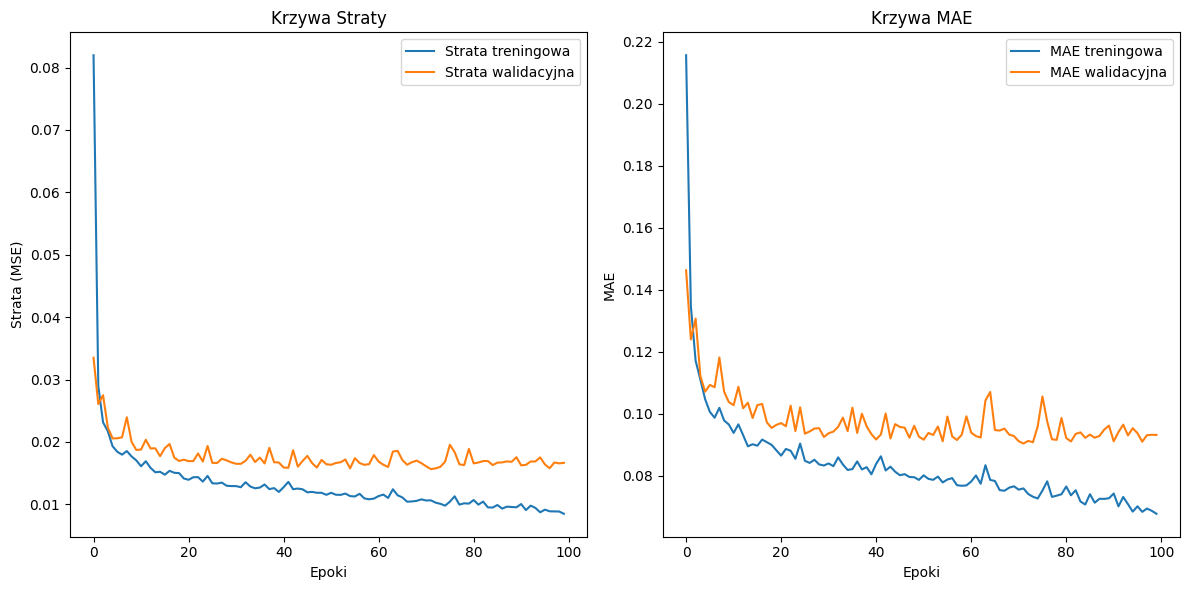

In [ ]:
# Wykres krzywych uczenia
plt.figure(figsize=(12, 6))

# Krzywa straty
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.title('Krzywa Straty')
plt.xlabel('Epoki')
plt.ylabel('Strata (MSE)')
plt.legend()

# Krzywa metryki (MAE w tym przypadku)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='MAE treningowa')
plt.plot(history.history['val_mean_absolute_error'], label='MAE walidacyjna')
plt.title('Krzywa MAE')
plt.xlabel('Epoki')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

Wnioski: Na podstawie powyższych krzywych można stwierdzić, że model uległ niewielkiej poprawie.

### **2. Model regresji - Lasso**

**Współczynniki regresji w funkcji alfy**

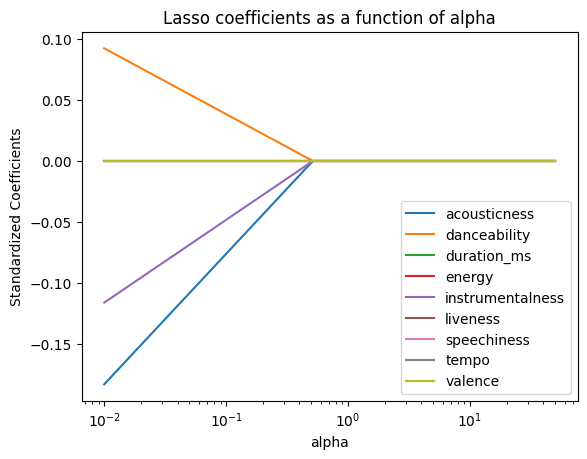

In [22]:
alphas = np.linspace(0.01,50,100)
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.legend(X)
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [24]:
# Dobór hiperparametrów (alpha) za pomocą LassoCV
lasso_cv = LassoCV(cv=5, random_state=42) # cv=5 oznacza 5-krotną kroswalidację
lasso_cv.fit(X_train, y_train)

best_alpha_before_selection = lasso_cv.alpha_
print(f"Najlepsze alpha przed selekcją cech: {best_alpha_before_selection}")

# Utworzenie i wytrenowanie modelu Lasso z najlepszym alpha przed selekcją
lasso_model_before_selection = Lasso(alpha=best_alpha_before_selection)
lasso_model_before_selection.fit(X_train, y_train)

# Ocena modelu przed selekcją cech
y_pred_before_selection = lasso_model_before_selection.predict(X_test)

mse_before_selection = mean_squared_error(y_test, y_pred_before_selection)
mae_before_selection = mean_absolute_error(y_test, y_pred_before_selection)

print(f"MSE przed selekcją cech: {mse_before_selection:.4f}")
print(f"MAE przed selekcją cech: {mae_before_selection:.4f}")

Najlepsze alpha przed selekcją cech: 2.8085463749081176e-05
MSE przed selekcją cech: 0.0244
MAE przed selekcją cech: 0.1187


In [25]:
# Model dla wybranej alfy
# Zmieniamy nazwe zmiennej zeby uniknac konfliktu z modelem neuronowym
lasso_model = Lasso(alpha = lasso_cv.alpha_)
lasso_model.fit(X_train, y_train)

# Współczynniki regresji

# Uzyjemy X.columns zeby miec nazwy cech
print(list(zip(lasso_model.coef_, X.columns)))

# wybrac istotne zmienne
# Utworzenie listy par (współczynnik, nazwa cechy)
coef_feature_pairs = list(zip(abs(lasso_model.coef_), X.columns))

# Sortowanie listy na podstawie wartości bezwzględnych współczynników
coef_feature_pairs.sort(reverse=True)

# Wybór 5 najlepszych cech
top_5_features = [feature for coef, feature in coef_feature_pairs[:5]]

print("5 najlepszych cech:", top_5_features)

[(np.float64(-0.14812725392633241), 'acousticness'), (np.float64(0.6447750328671048), 'danceability'), (np.float64(-0.727887472669341), 'duration_ms'), (np.float64(0.1287525471368297), 'energy'), (np.float64(-0.195481459284927), 'instrumentalness'), (np.float64(-0.22753966980447365), 'liveness'), (np.float64(-0.1078769892056326), 'speechiness'), (np.float64(0.08625825082216969), 'tempo'), (np.float64(-0.46645285396499564), 'valence')]
5 najlepszych cech: ['duration_ms', 'danceability', 'valence', 'liveness', 'instrumentalness']


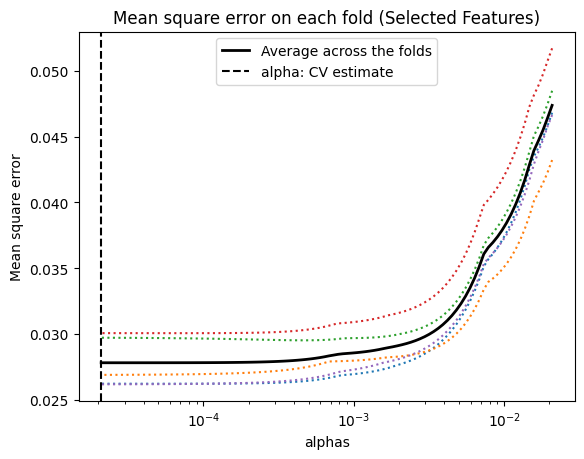

In [30]:
# Przygotowanie danych z wybranymi cechami
X_train_selected_lasso_coef = X_train[top_5_features]
X_test_selected_lasso_coef = X_test[top_5_features]

# Utworzenie i dopasowanie nowego modelu LassoCV na danych z wybranymi cechami
model_selected = LassoCV(cv=5, random_state=42, max_iter=10000)
model_selected.fit(X_train_selected_lasso_coef, y_train)

# Wizualizacja MSE w zależności od alfy dla nowego modelu
plt.semilogx(model_selected.alphas_, model_selected.mse_path_, ":")
plt.plot(
    model_selected.alphas_,
    model_selected.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model_selected.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold (Selected Features)")
plt.axis("tight")
plt.show()

**Komentarz:**

1. Czarna linia ("Average across the folds") - utrzymuje się na dość niskim poziomie poniżej wartości 0,03 dla parametru alpha < 0,002

2. Przecinająca linia przerywana ("alpha: CV estimate") - To wartość "alpha", którą model LassoCV wybrał jako najlepszą w tym punkcie błąd MSE jest najniższy

3. Pozostałe kolorowe linie (poszczególne foldy) - błąd dla wszystkich cech utrzymuje się na podobnym poziomie co wartość srednia, świadczy to o wysokiej stabilności modelu i małym niedużym zróżnicowaniu danych.

In [36]:
lasso_cv_coef_selection = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso_cv_coef_selection.fit(X_train_selected_lasso_coef, y_train)

best_alpha_lasso_coef_selection = lasso_cv_coef_selection.alpha_
print(f"Najlepsze alpha dla Lasso na cechach wybranych przez współczynniki: {best_alpha_lasso_coef_selection}")

# 3. Utworzenie i wytrenowanie modelu Lasso z najlepszą alfą NA wybranych cechach
lasso_model_coef_selected = Lasso(alpha=best_alpha_lasso_coef_selection)
lasso_model_coef_selected.fit(X_train_selected_lasso_coef, y_train)

# 4. Predykcja na danych testowych z wybranymi cechami
y_pred_lasso_coef_selection = lasso_model_coef_selected.predict(X_test_selected_lasso_coef)

# 5. Obliczenie MSE i MAE
mse_lasso_coef_selection = mean_squared_error(y_test, y_pred_lasso_coef_selection)
mae_lasso_coef_selection = mean_absolute_error(y_test, y_pred_lasso_coef_selection)


print(f"MSE modelu Lasso na cechach z selekcji 'Współczynniki Lasso': {mse_lasso_coef_selection:.4f}")
print(f"MAE modelu Lasso na cechach z selekcji 'Współczynniki Lasso': {mae_lasso_coef_selection:.4f}")

Najlepsze alpha dla Lasso na cechach wybranych przez współczynniki: 2.08677727861852e-05
MSE modelu Lasso na cechach z selekcji 'Współczynniki Lasso': 0.0287
MAE modelu Lasso na cechach z selekcji 'Współczynniki Lasso': 0.1264


**Selekcja cech z wykorzystaniem metody RFE.**

In [27]:
from sklearn.feature_selection import RFE

# Utworzenie modelu Lasso jako estymatora dla RFE
estimator = Lasso(alpha=best_alpha_before_selection)

# Utworzenie obiektu RFE
# n_features_to_select: liczba cech do zachowania (można eksperymentować)
# step: liczba cech do usunięcia w każdej iteracji (domyślnie 1)
rfe_selector = RFE(estimator=estimator, n_features_to_select=5, step=1) # Przykład: wybieramy 5 cech

# Dopasowanie RFE do danych treningowych
rfe_selector.fit(X_train, y_train)

# Zidentyfikowanie wybranych cech
selected_features_mask = rfe_selector.support_
selected_feature_names = X_train.columns[selected_features_mask]

print(f"\nWybrane cechy przez RFE: {list(selected_feature_names)}")

# Utworzenie nowych zbiorów danych treningowych i testowych z wybranymi cechami
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]


Wybrane cechy przez RFE: ['acousticness', 'danceability', 'duration_ms', 'liveness', 'valence']


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\n--- Analiza wpływu selekcji cech Lasso vs RFE ---")

print("\n--- Selekcja Cech metodą RFE z estymatorem Lasso ---")

# Utworzenie modelu Lasso jako estymatora dla RFE (używamy najlepszego alpha z pełnych danych)
estimator_rfe = Lasso(alpha=best_alpha_before_selection)

# Utworzenie obiektu RFE do wybrania tej samej liczby cech (np. 5)
rfe_selector = RFE(estimator=estimator_rfe, n_features_to_select=len(top_5_features), step=1) # Wybieramy tyle samo cech co w metodzie współczynników

# Dopasowanie RFE do danych treningowych
rfe_selector.fit(X_train, y_train)

# Zidentyfikowanie wybranych cech przez RFE
selected_features_mask_rfe = rfe_selector.support_
selected_feature_names_rfe = X_train.columns[selected_features_mask_rfe]

print(f"Wybrane cechy przez RFE: {list(selected_feature_names_rfe)}")

# Przygotowanie danych z wybranymi cechami RFE
X_train_selected_rfe = X_train[selected_feature_names_rfe]
X_test_selected_rfe = X_test[selected_feature_names_rfe]

# Trenowanie modelu LassoCV na danych z cechami wybranymi przez RFE
model_lasso_rfe_selected_cv = LassoCV(cv=5, random_state=42, max_iter=10000)
model_lasso_rfe_selected_cv.fit(X_train_selected_rfe, y_train)

# Najlepsze alpha dla Lasso na cechach wybranych przez RFE
best_alpha_rfe_selection = model_lasso_rfe_selected_cv.alpha_
print(f"Najlepsze alpha dla Lasso na cechach RFE: {best_alpha_rfe_selection}")

# Utworzenie i wytrenowanie modelu Lasso z najlepszym alpha na cechach RFE
lasso_model_rfe_selected = Lasso(alpha=best_alpha_rfe_selection)
lasso_model_rfe_selected.fit(X_train_selected_rfe, y_train)

# Ocena modelu Lasso na danych z cechami wybranymi przez RFE
y_pred_rfe_selected = lasso_model_rfe_selected.predict(X_test_selected_rfe)

mse_rfe_selection = mean_squared_error(y_test, y_pred_rfe_selected)
mae_rfe_selection = mean_absolute_error(y_test, y_pred_rfe_selected)

print(f"MSE modelu Lasso na cechach RFE: {mse_rfe_selection:.4f}")
print(f"MAE modelu Lasso na cechach RFE: {mae_rfe_selection:.4f}")


# --- Porównanie Wyników Obu Technik Selekcji (Lasso) ---
print("\n--- Porównanie wyników modeli Lasso po różnych technikach selekcji ---")

# Sprawdź, czy wyniki selekcji Lasso na podstawie współczynników są dostępne
try:
    print(f"MSE modelu Lasso na cechach z selekcji 'Współczynniki Lasso': {mse_lasso_coef_selection:.4f}")
    print(f"MAE modelu Lasso na cechach z selekcji 'Współczynniki Lasso': {mae_lasso_coef_selection:.4f}")

    print(f"MSE modelu Lasso na cechach z selekcji 'RFE z Lasso': {mse_rfe_selection:.4f}")
    print(f"MAE modelu Lasso na cechach z selekcji 'RFE z Lasso': {mae_rfe_selection:.4f}")

except NameError:
    print("\nBrak wyników dla modelu Lasso po selekcji cech na podstawie współczynników.")
    print("Upewnij się, że obliczyłeś MSE i MAE dla modelu Lasso wytrenowanego")
    print("na cechach wybranych przez sortowanie współczynników i zapisałeś je w zmiennych")
    print("'mse_lasso_coef_selection' i 'mae_lasso_coef_selection'.")


--- Analiza wpływu selekcji cech Lasso vs RFE ---

--- Selekcja Cech metodą RFE z estymatorem Lasso ---
Wybrane cechy przez RFE: ['acousticness', 'danceability', 'duration_ms', 'liveness', 'valence']
Najlepsze alpha dla Lasso na cechach RFE: 2.8085463749081176e-05
MSE modelu Lasso na cechach RFE: 0.0262
MAE modelu Lasso na cechach RFE: 0.1223

--- Porównanie wyników modeli Lasso po różnych technikach selekcji ---
MSE modelu Lasso na cechach z selekcji 'Współczynniki Lasso': 0.0287
MAE modelu Lasso na cechach z selekcji 'Współczynniki Lasso': 0.1264
MSE modelu Lasso na cechach z selekcji 'RFE z Lasso': 0.0262
MAE modelu Lasso na cechach z selekcji 'RFE z Lasso': 0.1223


**Komentarz:**

Technika selekcji cech RFE z estymatorem Lasso dała - lepsze wyniki dla modelu Lasso na danych testowych (niższe MAE).

MSE modelu Lasso na WSZYSTKICH cechach: `0.0244`

MAE modelu Lasso na WSZYSTKICH cechach: `0.1187`

**Lasso:** To model regresji z wbudowaną metodą selekcji cech (przez zerowanie współczynników). Możesz go użyć do zidentyfikowania ważnych cech.

**RFE z Lasso:** To technika selekcji cech, która używa Lasso jako narzędzia do oceniania ważności cech i iteracyjnie usuwa najmniej ważne, aż zostanie pożądana liczba cech. Daje to zazwyczaj podzbiór cech, na którym później możesz trenować dowolny model (nie tylko Lasso).

**Ponowne dobranie hiperparametrów dla zbioru złożonego z wybranych cech**

In [37]:
print("\n--- Dobór hiperparametrów dla modelu neuronowego (po selekcji cech RFE) ---")

# Definiowanie przestrzeni hiperparametrów do przeszukania
param_grid_selected_rfe = {
    'num_neurons_layer1': [128, 256], # Liczba neuronów w pierwszej warstwie ukrytej
    'num_neurons_layer2': [32, 64, 128], # Liczba neuronów w drugiej warstwie ukrytej (None oznacza brak drugiej warstwy)
    'num_neurons_layer3': [16, 32, None], # Dodana: Liczba neuronów w trzeciej warstwie ukrytej (None oznacza brak trzeciej warstwy)
    'learning_rate': [0.001, 0.0005], # Szybkość uczenia optymalizatora Adam
    'epochs': [100], # Liczba epok (ustawiona na stałe dla skrócenia przykładu, można dodać do przeszukiwania)
    'batch_size': [32] # Rozmiar partii (ustawiony na stałe)
}

best_mae_selected_rfe = float('inf')
best_params_selected_rfe = None
results_selected_rfe = [] # Do przechowywania wyników dla każdej kombinacji

# Iterowanie przez kombinacje hiperparametrów
for num_neurons1 in param_grid_selected_rfe['num_neurons_layer1']:
    for num_neurons2 in param_grid_selected_rfe['num_neurons_layer2']:
        for num_neurons3 in param_grid_selected_rfe['num_neurons_layer3']:
            for lr in param_grid_selected_rfe['learning_rate']:
                for epochs in param_grid_selected_rfe['epochs']:
                    for batch_size in param_grid_selected_rfe['batch_size']:

                        # Pomijamy kombinacje, które mają trzecią warstwę bez drugiej
                        if num_neurons3 is not None and num_neurons2 is None:
                            continue

                        print(f'Trenowanie z params: Neurony1={num_neurons1}, Neurony2={num_neurons2}, Neurony3={num_neurons3}, LR={lr}, Epoki={epochs}, Batch={batch_size}')

                        # Tworzenie modelu z bieżącą kombinacją hiperparametrów
                        model = Sequential()
                        # *** WAŻNE: Input shape zależy od liczby wybranych cech RFE ***
                        model.add(Dense(num_neurons1, activation='relu', input_shape=(X_train_selected_rfe.shape[1],)))
                        if num_neurons2 is not None:
                            model.add(Dense(num_neurons2, activation='relu'))
                            if num_neurons3 is not None:
                                model.add(Dense(num_neurons3, activation='relu'))
                        model.add(Dense(1))

                        # Kompilacja modelu
                        model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error', metrics=['mean_absolute_error'])

                        # Trenowanie modelu na DANYCH PO SELEKCJI RFE (verbose=0)
                        # Używamy validation_split na zbiorze treningowym do oceny podczas treningu
                        history = model.fit(X_train_selected_rfe, y_train,
                                            epochs=epochs,
                                            batch_size=batch_size,
                                            validation_split=0.2, # Możesz dostosować
                                            verbose=0)

                        # Ocena modelu na DANYCH TESTOWYCH PO SELEKCJI RFE
                        loss, mae = model.evaluate(X_test_selected_rfe, y_test, verbose=0)
                        print(f'  MAE na danych testowych (po selekcji RFE): {mae:.4f}')

                        # Zapisywanie wyników
                        current_params = {
                            'num_neurons_layer1': num_neurons1,
                            'num_neurons_layer2': num_neurons2,
                            'num_neurons_layer3': num_neurons3,
                            'learning_rate': lr,
                            'epochs': epochs,
                            'batch_size': batch_size
                        }
                        results_selected_rfe.append({'params': current_params, 'test_mae': mae, 'test_loss': loss})

                        # Sprawdzanie, czy bieżąca kombinacja jest najlepsza
                        if mae < best_mae_selected_rfe:
                            best_mae_selected_rfe = mae
                            best_params_selected_rfe = current_params

# Wyświetlenie najlepszych parametrów i wyników
print(f'\n--- Najlepsze Wyniki dla modelu neuronowego (po selekcji cech RFE) ---')
print(f'Najlepsza MAE na danych testowych (po selekcji RFE): {best_mae_selected_rfe:.4f}')
print(f'Najlepsze hiperparametry (po selekcji RFE): {best_params_selected_rfe}')

# Opcjonalnie: Sortowanie wyników po MAE, aby zobaczyć najlepsze kombinacje
results_selected_rfe_df = pd.DataFrame(results_selected_rfe).sort_values(by='test_mae')
print('\n--- Wszystkie Wyniki (po selekcji cech RFE, posortowane wg MAE) ---')
print(results_selected_rfe_df)


--- Dobór hiperparametrów dla modelu neuronowego (po selekcji cech RFE) ---
Trenowanie z params: Neurony1=128, Neurony2=32, Neurony3=16, LR=0.001, Epoki=100, Batch=32
  MAE na danych testowych (po selekcji RFE): 0.1046
Trenowanie z params: Neurony1=128, Neurony2=32, Neurony3=16, LR=0.0005, Epoki=100, Batch=32
  MAE na danych testowych (po selekcji RFE): 0.1045
Trenowanie z params: Neurony1=128, Neurony2=32, Neurony3=32, LR=0.001, Epoki=100, Batch=32
  MAE na danych testowych (po selekcji RFE): 0.1043
Trenowanie z params: Neurony1=128, Neurony2=32, Neurony3=32, LR=0.0005, Epoki=100, Batch=32
  MAE na danych testowych (po selekcji RFE): 0.1091
Trenowanie z params: Neurony1=128, Neurony2=32, Neurony3=None, LR=0.001, Epoki=100, Batch=32
  MAE na danych testowych (po selekcji RFE): 0.1070
Trenowanie z params: Neurony1=128, Neurony2=32, Neurony3=None, LR=0.0005, Epoki=100, Batch=32
  MAE na danych testowych (po selekcji RFE): 0.1092
Trenowanie z params: Neurony1=128, Neurony2=64, Neurony3=1


--- Wizualizacja wpływu hiperparametrów na MAE (po selekcji cech RFE) ---


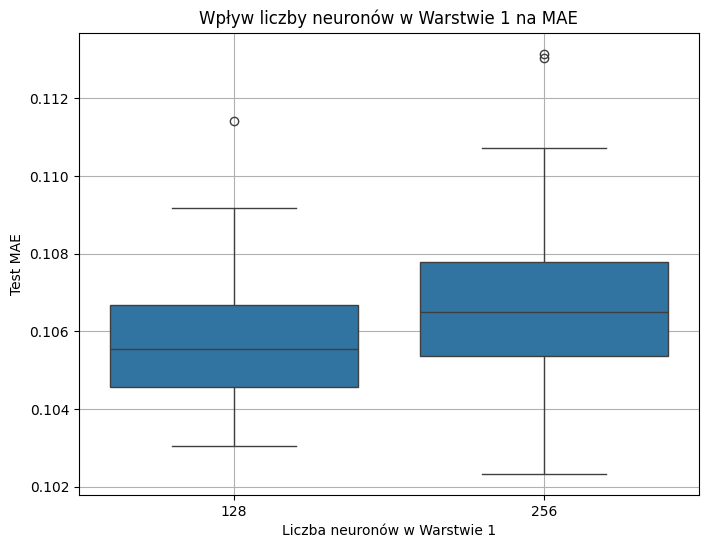

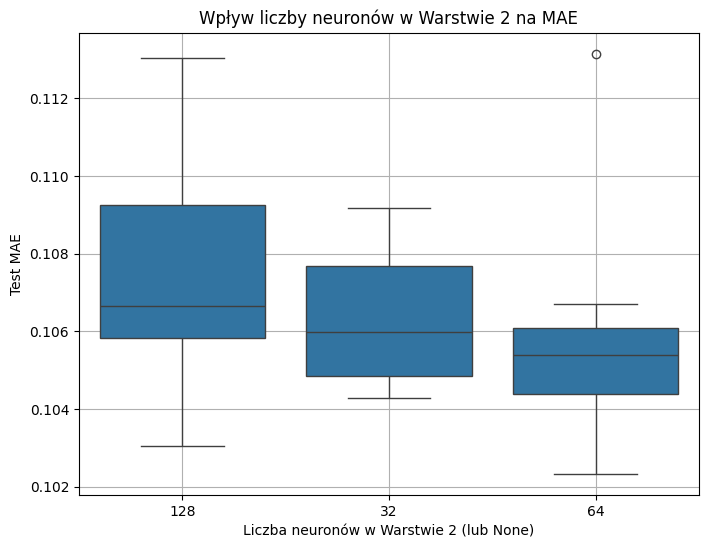

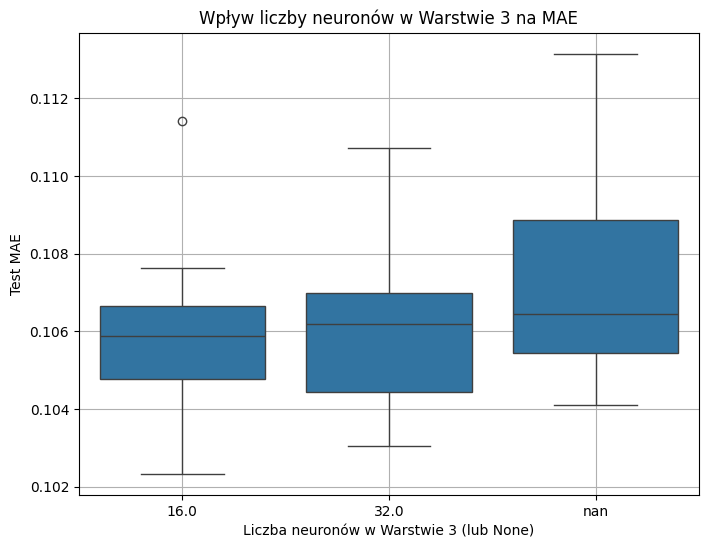

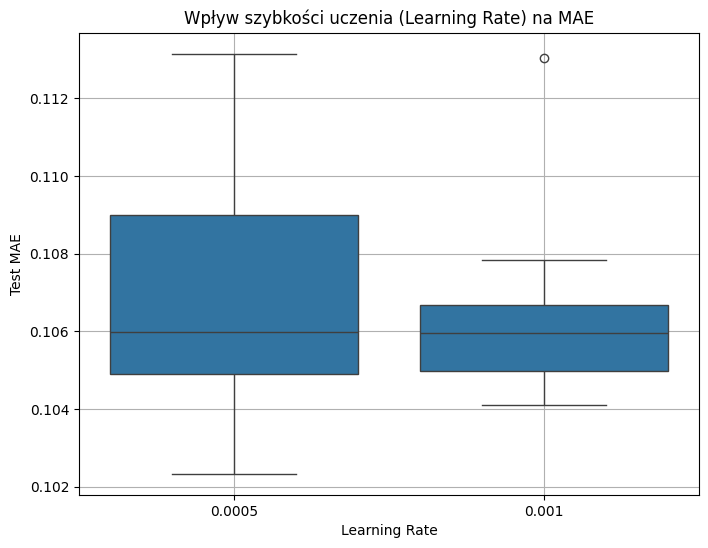

In [45]:
print("\n--- Wizualizacja wpływu hiperparametrów na MAE (po selekcji cech RFE) ---")

# Konwersja wyników do DataFrame dla łatwiejszej analizy i wizualizacji
results_df = pd.DataFrame(results_selected_rfe)

# Rozpakowanie słownika z parametrami do osobnych kolumn
params_df = pd.json_normalize(results_df['params'])
results_df = pd.concat([results_df.drop('params', axis=1), params_df], axis=1)

# Upewnij się, że kolumny z hiperparametrami są odpowiedniego typu (zwłaszcza te z None)
results_df['num_neurons_layer2'] = results_df['num_neurons_layer2'].astype(str)
results_df['num_neurons_layer3'] = results_df['num_neurons_layer3'].astype(str)
results_df['learning_rate'] = results_df['learning_rate'].astype(str)
results_df['epochs'] = results_df['epochs'].astype(str) # Jeśli epochs są zmienne
results_df['batch_size'] = results_df['batch_size'].astype(str) # Jeśli batch_size są zmienne

# Wizualizacje dla każdego hiperparametru vs MAE

# Wpływ num_neurons_layer1
plt.figure(figsize=(8, 6))
sns.boxplot(x='num_neurons_layer1', y='test_mae', data=results_df)
plt.title('Wpływ liczby neuronów w Warstwie 1 na MAE')
plt.xlabel('Liczba neuronów w Warstwie 1')
plt.ylabel('Test MAE')
plt.grid(True)
plt.show()

# Wpływ num_neurons_layer2 (uwzględniając None)
plt.figure(figsize=(8, 6))
# Sortujemy kategorie, żeby None był gdzieś sensownie (np. na końcu)
order_layer2 = sorted(results_df['num_neurons_layer2'].unique(), key=lambda x: (x == 'None', x))
sns.boxplot(x='num_neurons_layer2', y='test_mae', data=results_df, order=order_layer2)
plt.title('Wpływ liczby neuronów w Warstwie 2 na MAE')
plt.xlabel('Liczba neuronów w Warstwie 2 (lub None)')
plt.ylabel('Test MAE')
plt.grid(True)
plt.show()

# Wpływ num_neurons_layer3 (uwzględniając None)
plt.figure(figsize=(8, 6))
# Sortujemy kategorie, żeby None był gdzieś sensownie
order_layer3 = sorted(results_df['num_neurons_layer3'].unique(), key=lambda x: (x == 'None', x))
sns.boxplot(x='num_neurons_layer3', y='test_mae', data=results_df, order=order_layer3)
plt.title('Wpływ liczby neuronów w Warstwie 3 na MAE')
plt.xlabel('Liczba neuronów w Warstwie 3 (lub None)')
plt.ylabel('Test MAE')
plt.grid(True)
plt.show()


# Wpływ learning_rate
plt.figure(figsize=(8, 6))
# Sortujemy numerycznie learning rate (jeśli są liczbami, jeśli stringi to leksykograficznie)
order_lr = sorted(results_df['learning_rate'].unique()) # Sortowanie jako string
sns.boxplot(x='learning_rate', y='test_mae', data=results_df, order=order_lr)
plt.title('Wpływ szybkości uczenia (Learning Rate) na MAE')
plt.xlabel('Learning Rate')
plt.ylabel('Test MAE')
plt.grid(True)
plt.show()

**Powyżej przedstawiono wizualizację jak zależnie od hiperparametrów zmieniał się MAE**

**Komentarz:**
Jak widać ilość neuronów w warstwie nie zawsze wpływała pozytywnie na zmniejszenie błędu MAE.

--- Najlepsze Wyniki dla modelu neuronowego (po selekcji cech RFE) ---

Najlepsza **MAE** na danych testowych (po selekcji RFE): 0.1023

**Najlepsze hiperparametry (po selekcji RFE):** {'num_neurons_layer1': `256`, 'num_neurons_layer2': `64`, 'num_neurons_layer3': `16`, 'learning_rate': `0.0005`, 'epochs': `100`, 'batch_size': `32`}



--- Trenowanie i ocena finalnego modelu neuronowego (po selekcji cech RFE) ---

Podsumowanie finalnego modelu neuronowego (po selekcji cech RFE):


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_139 (Dense)               │ (None, 256)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,041 (74.38 KB)

 Trainable params: 19,041 (74.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2149 - mean_absolute_error: 0.3911 - val_loss: 0.0404 - val_mean_absolute_error: 0.1562
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378 - mean_absolute_error: 0.1535 - val_loss: 0.0309 - val_mean_absolute_error: 0.1333
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0296 - mean_absolute_error: 0.1313 - val_loss: 0.0280 - val_mean_absolute_error: 0.1250
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0281 - mean_absolute_error: 0.1243 - val_loss: 0.0265 - val_mean_absolute_error: 0.1218
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0258 - mean_absolute_error: 0.1200 - val_loss: 0.0256 - val_mean_absolute_error: 0.1207
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0243 - mean_absolute_error: 0.1180 - val_loss: 0.0249 - val_mean_absolute_error: 0.1187
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0216 - mean_absolute_error: 0.1090 - val_los

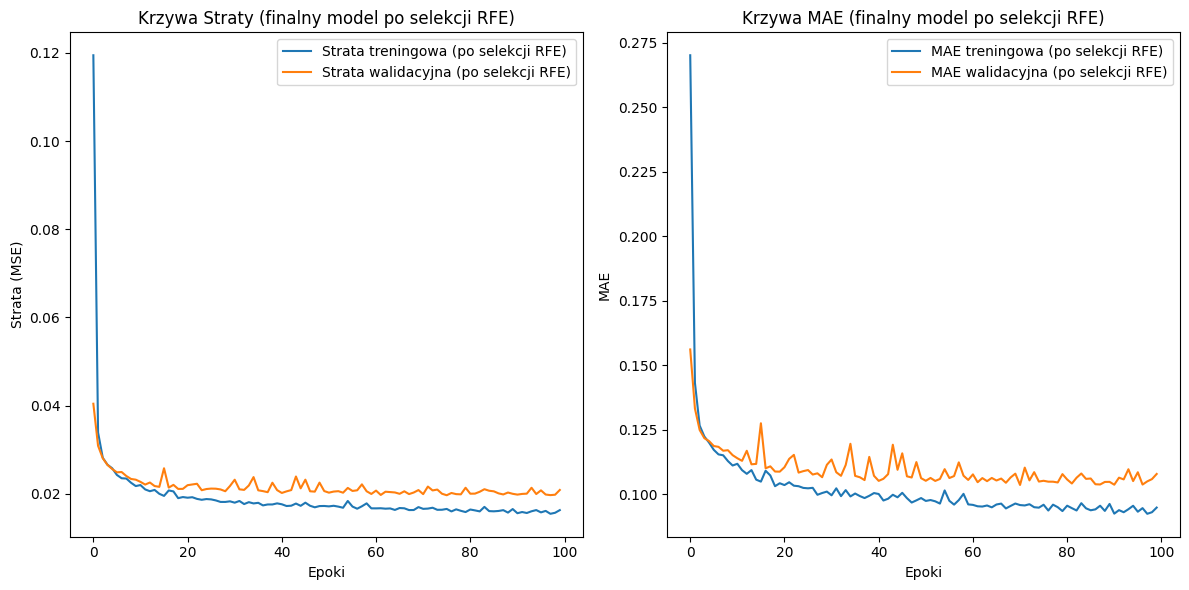

In [50]:
print("\n--- Trenowanie i ocena finalnego modelu neuronowego (po selekcji cech RFE) ---")

# Najlepsze hiperparametry znalezione w przeszukiwaniu (Upewnij się, że masz je tutaj zdefiniowane lub dostępne)
best_params_selected_rfe = {
    'num_neurons_layer1': 256,
    'num_neurons_layer2': 64,
    'num_neurons_layer3': 16, # Przykład, jeśli masz 3 warstwy
    'learning_rate': 0.0005,
    'epochs': 100,
    'batch_size': 32
}

# 1. Tworzenie modelu z najlepszymi hiperparametrami
final_model_selected_rfe = Sequential()

# Warstwa wejściowa i pierwsza ukryta
final_model_selected_rfe.add(Dense(best_params_selected_rfe['num_neurons_layer1'],
                                   activation='relu',
                                   input_shape=(X_train_selected_rfe.shape[1],))) # Input shape na podstawie wybranych cech

# Dodawanie kolejnych warstw ukrytych, jeśli istnieją w najlepszych parametrach
if best_params_selected_rfe.get('num_neurons_layer2') is not None:
    final_model_selected_rfe.add(Dense(best_params_selected_rfe['num_neurons_layer2'], activation='relu'))
    # Sprawdź, czy jest też trzecia warstwa
    if best_params_selected_rfe.get('num_neurons_layer3') is not None:
        final_model_selected_rfe.add(Dense(best_params_selected_rfe['num_neurons_layer3'], activation='relu'))

# Warstwa wyjściowa (dla regresji)
final_model_selected_rfe.add(Dense(1))

# 2. Kompilacja modelu
final_model_selected_rfe.compile(optimizer=Adam(learning_rate=best_params_selected_rfe['learning_rate']),
                                 loss='mean_squared_error',
                                 metrics=['mean_absolute_error'])

print("\nPodsumowanie finalnego modelu neuronowego (po selekcji cech RFE):")
final_model_selected_rfe.summary()

# 3. Trenowanie modelu
history_final_selected_rfe = final_model_selected_rfe.fit(X_train_selected_rfe, y_train,
                                                          epochs=best_params_selected_rfe['epochs'],
                                                          batch_size=best_params_selected_rfe['batch_size'],
                                                          validation_split=0.2, # Używamy validation_split podczas treningu
                                                          callbacks=[History()]) # History callback do zapisu przebiegu treningu

# 4. Ocena Modelu na Danych Testowych (po selekcji cech RFE)
loss_final_selected_rfe, mae_final_selected_rfe = final_model_selected_rfe.evaluate(X_test_selected_rfe, y_test, verbose=0)

print(f'\nMean Squared Error on test data (final model po selekcji RFE): {loss_final_selected_rfe:.4f}')
print(f'Mean Absolute Error on test data (final model po selekcji RFE): {mae_final_selected_rfe:.4f}')

# 5. Obliczenie R2 dla finalnego modelu po selekcji RFE
from sklearn.metrics import r2_score
import numpy as np

y_pred_final_selected_rfe = final_model_selected_rfe.predict(X_test_selected_rfe).flatten()
r2_final_selected_rfe = r2_score(y_test, y_pred_final_selected_rfe)
print(f'R2 Score on test data (final model po selekcji RFE): {r2_final_selected_rfe:.4f}')

# Wizualizacja krzywych uczenia dla finalnego modelu po selekcji
plt.figure(figsize=(12, 6))

# Krzywa straty
plt.subplot(1, 2, 1)
plt.plot(history_final_selected_rfe.history['loss'], label='Strata treningowa (po selekcji RFE)')
plt.plot(history_final_selected_rfe.history['val_loss'], label='Strata walidacyjna (po selekcji RFE)')
plt.title('Krzywa Straty (finalny model po selekcji RFE)')
plt.xlabel('Epoki')
plt.ylabel('Strata (MSE)')
plt.legend()

# Krzywa metryki (MAE)
plt.subplot(1, 2, 2)
plt.plot(history_final_selected_rfe.history['mean_absolute_error'], label='MAE treningowa (po selekcji RFE)')
plt.plot(history_final_selected_rfe.history['val_mean_absolute_error'], label='MAE walidacyjna (po selekcji RFE)')
plt.title('Krzywa MAE (finalny model po selekcji RFE)')
plt.xlabel('Epoki')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


### **Porównanie wyników przed oraz po selekcji cech RFE**


--- Porównanie Wyników Modeli Neuronowych (Przed vs Po Selekcji RFE) ---


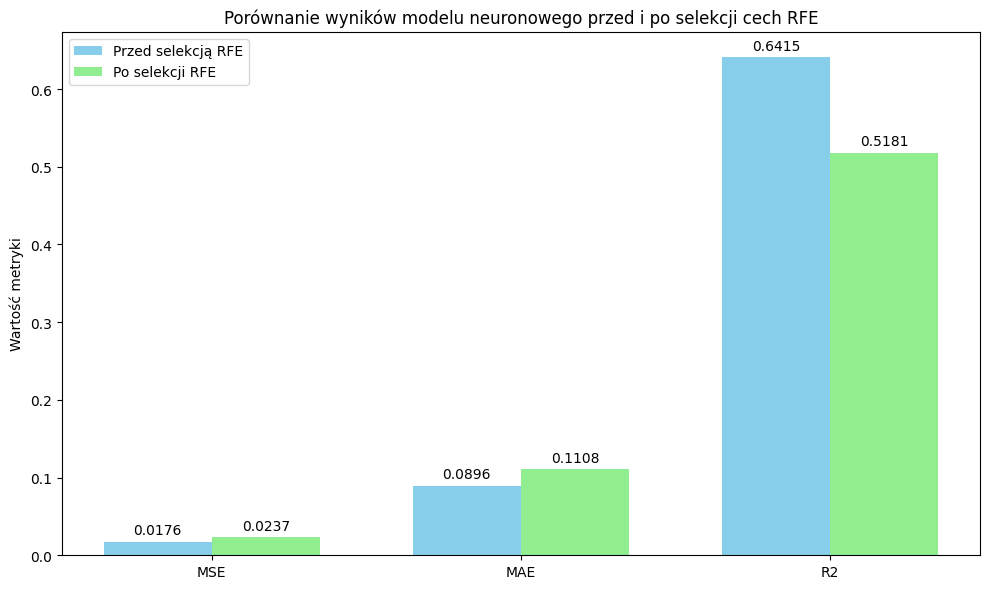

In [57]:
# Ten kod zakłada, że masz zdefiniowane następujące zmienne
# z poprzednich kroków:
# mse_before_selection_nn
# mae_before_selection_nn
# r2_before_selection_nn
# loss_final_selected (MSE po selekcji RFE)
# mae_final_selected (MAE po selekcji RFE)
# r2_after_selection_nn (R2 po selekcji RFE)

import matplotlib.pyplot as plt
import numpy as np

print("\n--- Porównanie Wyników Modeli Neuronowych (Przed vs Po Selekcji RFE) ---")

# Przygotowanie danych do wykresów porównawczych
metrics = ['MSE', 'MAE', 'R2']
results_before = [mse_before_selection_nn, mae_before_selection_nn, r2_before_selection_nn]
results_after = [loss_final_selected_rfe, mae_final_selected_rfe, r2_final_selected_rfe] # loss_final_selected to MSE po selekcji

x = np.arange(len(metrics)) # Położenia metryk na osi X
width = 0.35 # Szerokość słupków

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, results_before, width, label='Przed selekcją RFE', color='skyblue')
rects2 = ax.bar(x + width/2, results_after, width, label='Po selekcji RFE', color='lightgreen')

# Dodanie etykiet, tytułu i legendy
ax.set_ylabel('Wartość metryki')
ax.set_title('Porównanie wyników modelu neuronowego przed i po selekcji cech RFE')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Funkcja pomocnicza do dodawania wartości na słupkach
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 punkty pionowego przesunięcia
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Komentarz do porównania:
- MSE przed selekcją: 0.0176, po selekcji RFE: 0.0237
- MAE przed selekcją: 0.0896, po selekcji RFE: 0.1108
- R2 przed selekcją: 0.5181, po selekcji RFE: 0.6415

Selekcja cech RFE ZWIĘKSZYŁA błąd MAE.

Selekcja cech RFE ZMNIEJSZYŁA współczynnik R2, co sugeruje gorsze dopasowanie modelu.

Selekcja cech RFE ZWIĘKSZYŁA błąd MSE.

**WNIOSKI:**

W tym konkretnym eksperymencie, selekcja cech metodą RFE z użyciem estymatora Lasso do wyboru podzbioru cech nie przyniosła korzyści dla modelu neuronowego w zakresie poprawy dokładności predykcji. Model wytrenowany na wszystkich cechach (przed selekcją RFE) uzyskał nieco lepsze wyniki pod względem MSE, MAE i R2 na danych testowych.

### **Czym cechuje się popularny utwór? (problem dodatkowy)**

In [87]:
print("\n--- Analiza wpływu cech na popularność (użycie najlepszego modelu neuronowego - Przed selekcją) ---")

# Używamy modelu neuronowego wytrenowanego PRZED selekcją RFE (zmienna 'model_nn')
model_for_analysis = model_nn # Zmieniamy nazwę dla przejrzystości

# Obliczanie średnich/median cech ze zbioru treningowego jako punktu bazowego
# Użyjemy średnich, ale mediany też są opcją
average_features = X_train.mean() # X_train to dane PRZED selekcją RFE i jakimkolwiek usuwaniem kolumn (po skalowaniu)

print("\nŚrednie wartości cech w zbiorze treningowym (Przed selekcją kolumn, po skalowaniu):")
print(average_features)

# Przygotowanie "bazowego" utworu jako DataFrame
# Musimy upewnić się, że ma ten sam kształt i kolejność kolumn co X_train/X_test
base_song = pd.DataFrame([average_features], columns=X_train.columns)
base_song_array = base_song.values # Konwersja do numpy array - MODEL OCZEKUJE TEGO FORMATU


--- Analiza wpływu cech na popularność (użycie najlepszego modelu neuronowego - Przed selekcją) ---

Średnie wartości cech w zbiorze treningowym (Przed selekcją kolumn, po skalowaniu):
acousticness        0.325813
danceability        0.507818
duration_ms         0.263345
energy              0.559968
instrumentalness    0.157728
liveness            0.367254
speechiness         0.196688
tempo               0.485886
valence             0.490146
dtype: float64



--- Symulacja wpływu poszczególnych cech na przewidywaną popularność (użycie model_nn) ---
Analiza wpływu cechy: acousticness
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Analiza wpływu cechy: danceability
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Analiza wpływu cechy: duration_ms
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Analiza wpływu cechy: energy
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Analiza wpływu cechy: instrumentalness
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Analiza wpływu cechy: liveness
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Analiza wpływu cechy: speechiness
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Analiza wpływu cechy: tempo
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Analiza wpływu cechy: valence
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

--- Wizualizacja wpływu poszczególnych cech ---


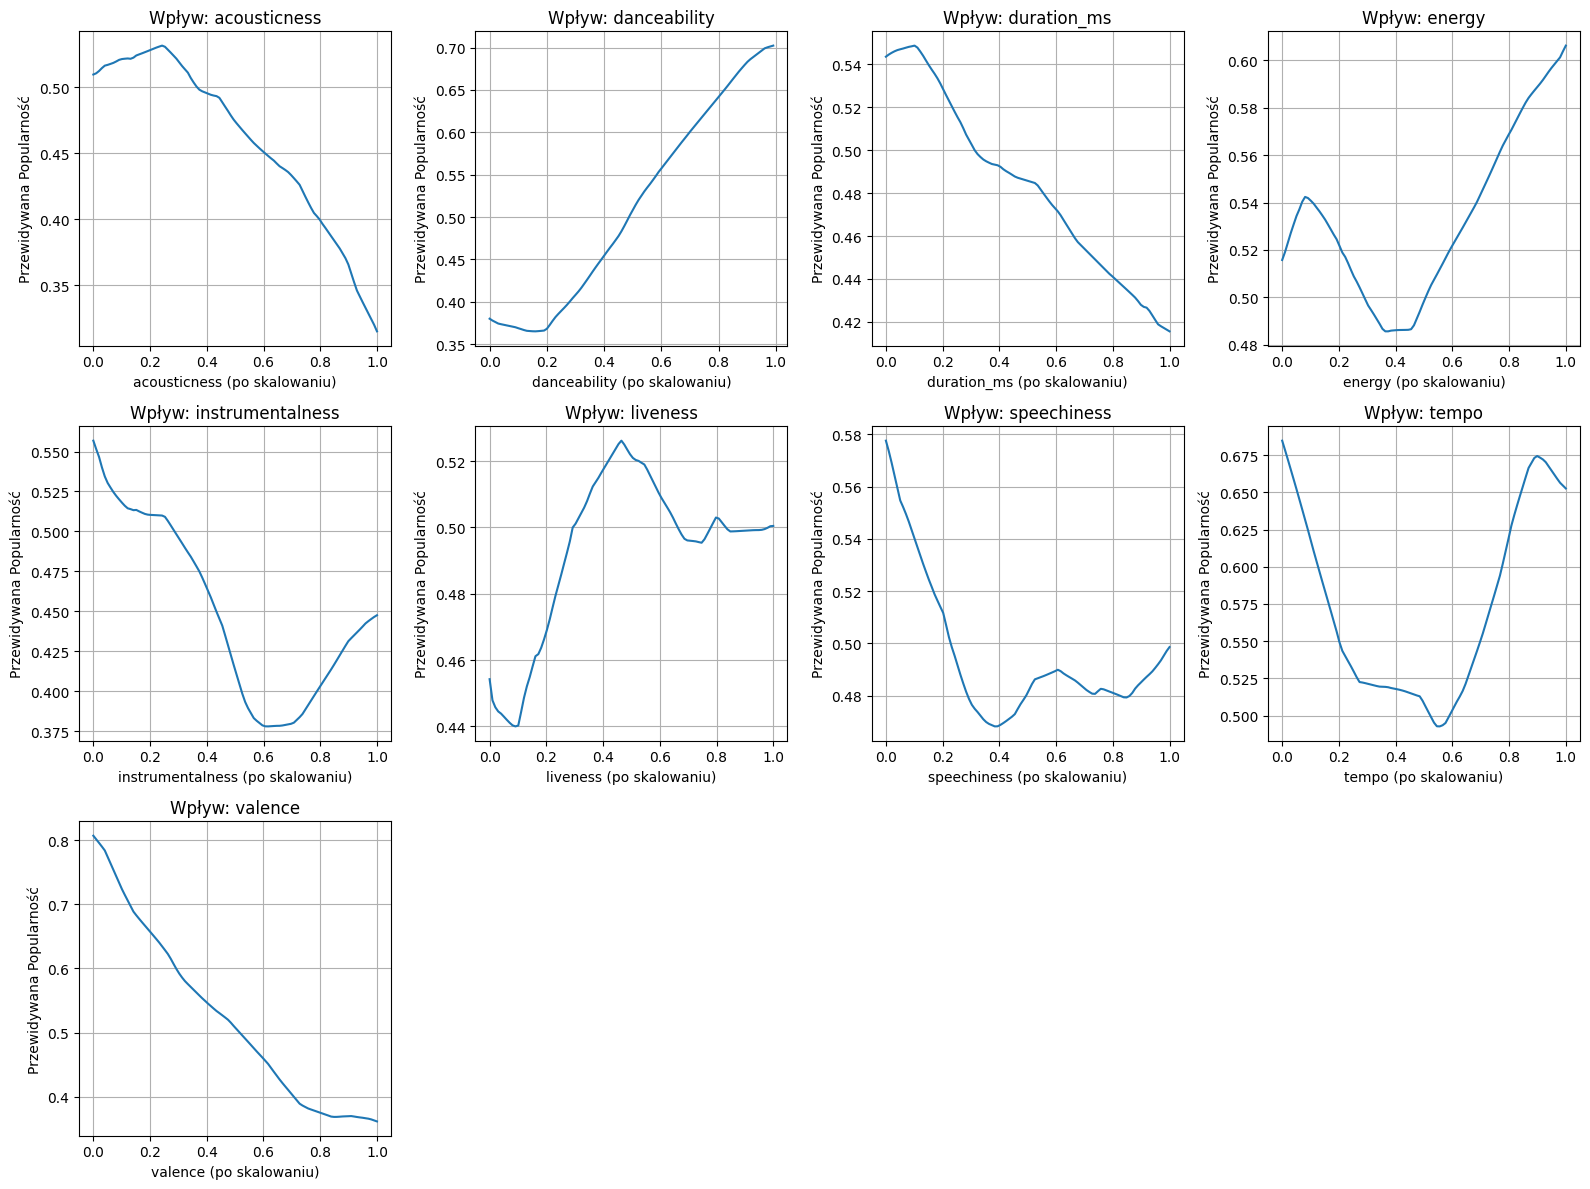

In [88]:
print("\n--- Symulacja wpływu poszczególnych cech na przewidywaną popularność (użycie model_nn) ---")

# Lista cech do analizy
# Analizujemy wszystkie cechy, na których był trenowany model_nn
features_to_analyze = X_train.columns # Używamy kolumn z X_train PRZED selekcją RFE

# Zakres wartości do przetestowania dla każdej cechy (np. 100 punktów od min do max z danych treningowych)
num_steps = 100

feature_effect_results = {}

# Iteracja przez każdą cechę
for feature in features_to_analyze:
    print(f"Analiza wpływu cechy: {feature}")

    # Tworzymy bazowe dane do symulacji - wiele kopii "bazowego" utworu
    simulated_data = np.tile(base_song_array, (num_steps, 1))

    # Generujemy wartości do przetestowania dla bieżącej cechy
    min_val = X_train[feature].min()
    max_val = X_train[feature].max()

    if min_val == max_val: # Obsługa przypadku, gdy cecha ma tylko jedną wartość
        test_values = np.array([min_val])
        # Zmniejszamy num_steps w tym przypadku, żeby nie powielać obliczeń
        current_num_steps = 1
        simulated_data = np.tile(base_song_array, (current_num_steps, 1))
    else:
        test_values = np.linspace(min_val, max_val, num_steps)
        current_num_steps = num_steps

    # Lokalizujemy indeks kolumny dla bieżącej cechy w oryginalnym X_train/X_test
    feature_index = X_train.columns.get_loc(feature)

    # Ustawiamy wartości bieżącej cechy w symulowanych danych
    simulated_data[:, feature_index] = test_values


    # Przewidujemy popularność dla każdej symulowanej wersji utworu
    # Używamy modelu model_nn
    predicted_popularity = model_for_analysis.predict(simulated_data).flatten()

    # Zapisujemy wyniki
    feature_effect_results[feature] = {
        'test_values': test_values,
        'predicted_popularity': predicted_popularity
    }


print("\n--- Wizualizacja wpływu poszczególnych cech ---")

n_features = len(features_to_analyze)
# Ustawienie rozmiaru siatki wykresów
n_cols = 4 # Możesz dostosować
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 4)) # Dostosuj rozmiar rysunku

# Rysowanie wykresu dla każdej cechy
for i, feature in enumerate(features_to_analyze):
    plt.subplot(n_rows, n_cols, i + 1)
    results = feature_effect_results[feature]
    plt.plot(results['test_values'], results['predicted_popularity'])
    plt.title(f'Wpływ: {feature}')
    plt.xlabel(f'{feature} (po skalowaniu)')
    plt.ylabel('Przewidywana Popularność')
    plt.grid(True)

plt.tight_layout()
plt.show()


**Wnioski ogólne z analizy:**

**Cechy, które pozytywnie korelują z popularnością:**

`Danceability` – im bardziej taneczny utwór, tym większa przewidywana popularność. Wskazuje to na to, że rytmiczne, łatwe do tańczenia kawałki są chętniej słuchane.

`Energy` – wyższa energia również sprzyja popularności. Dynamiczne i żywe utwory są bardziej pożądane.

`Valence` – wysoki poziom pozytywności utworu (np. wesołość, optymizm) zwiększa szanse na popularność.

`Tempo` – bardzo niskie (po skalowaniu < ~0.2), lub wysokie tempa (po skalowaniu ~0.8) wpływają pozytywnie. Utwory szybkie mogą być bardziej ekscytujące i przyciągające.

`Liveness` (nieliniowe zmiany) – niskie wartości liveness są mniej popularne, natomiast srednie wartości zwiększają szanse – sugeruje to, że lekki „koncertowy” charakter jest atrakcyjny.

**Cechy, które negatywnie korelują z popularnością:**

`Acousticness` – im bardziej akustyczny utwór, tym mniej popularny. Wskazuje to na przewagę produkcji elektronicznych nad "czysto" akustycznymi.

`Duration` – dłuższe utwory mają tendencję do niższej popularności.

`Speechiness` – im więcej mowy (np. spoken word, rap), tym mniejsza przewidywana popularność, przynajmniej wśród bardziej ekstremalnych wartości.

`Instrumentalness` – utwory czysto instrumentalne są mniej popularne; słuchacze preferują utwory z wokalem.

**Najlepsze parametry utworu:**

In [97]:
print("\n--- Analiza optymalnych wartości cech (Powrót do PIERWOTNEJ skali za pomocą pierwszego skalera) ---")

# Liczba kolumn w danych, na których NAUCZONO PIERWSZY scaler (obiekt scaler)
correct_num_features_for_first_scaler = 13

original_data_columns = ['acousticness', 'danceability', 'duration_ms', 'energy',
                         'instrumentalness', 'liveness', 'loudness', 'speechiness',
                         'tempo', 'valence', 'popularity', 'key', 'mode'] # 13 kolumn

popularity_column_index_original = original_data_columns.index('popularity')

tempo_min_scaled_threshold = 0.2

optimal_feature_values_original_scale = {}

# Iteracja przez każdą cechę, którą analizowaliśmy w symulacji (te 9 cech X)
for feature_x_name, results in feature_effect_results.items():
    # Wyniki symulacji są w skali DANYCH_SCAL_4 (czyli po OSTATNIM skalowaniu)
    test_values_scaled_final = results['test_values'] # Wartości cechy X w skali scaler_final ([0,1] z dane_scal_4)
    predicted_popularity_scaled_final = results['predicted_popularity'] # Przewidziana popularność w skali scaler_final ([0,1])


    # --- SPECJALNA LOGIKA DLA CECHY 'TEMPO' ---
    if feature_x_name == 'tempo':
        print(f"Specjalna analiza dla cechy: {feature_x_name}")
        # Stwórz maskę: True tam, gdzie skalowane tempo >= threshold
        valid_tempo_mask = test_values_scaled_final >= tempo_min_scaled_threshold
        # Zastosuj maskę do przewidzianej popularności
        predicted_popularity_for_valid_tempo = predicted_popularity_scaled_final[valid_tempo_mask]
        test_values_for_valid_tempo = test_values_scaled_final[valid_tempo_mask]
        if len(predicted_popularity_for_valid_tempo) == 0:
            print(f"Brak wartości tempo >= {tempo_min_scaled_threshold} w symulacji. Pomijanie cechy 'tempo'.")
            continue # Pomijamy cechę, jeśli wszystkie wartości są poniżej progu
        # Znajdź indeks wartości z największą przewidzianą popularnością TYLKO wśród poprawnych wartości tempo
        max_popularity_index_valid = np.argmax(predicted_popularity_for_valid_tempo)
        optimal_scaled_final_feature_value = test_values_for_valid_tempo[max_popularity_index_valid]
        print(f"  Znaleziono optymalną skalowaną wartość tempo (>= {tempo_min_scaled_threshold}): {optimal_scaled_final_feature_value:.4f}")
    else:
        # Znajdź indeks wartości z największą przewidzianą popularnością
        max_popularity_index = np.argmax(predicted_popularity_scaled_final)
        # Pobierz odpowiadającą standaryzowaną wartość cechy
        optimal_scaled_final_feature_value = test_values_scaled_final[max_popularity_index]


    dummy_row_for_first_scaler = np.zeros((1, correct_num_features_for_first_scaler)) # 13 kolumn

    # Znajdujemy indeks bieżącej cechy X W ORYGINALNYCH DANYCH (tych z 13 kolumnami)
    try:
        feature_original_index = original_data_columns.index(feature_x_name)
    except ValueError:
         print(f"Ostrzeżenie: Cecha '{feature_x_name}' nie znaleziona w oryginalnych kolumnach danych (13). Pomijanie.")
         continue

    dummy_row_for_first_scaler[0, feature_original_index] = optimal_scaled_final_feature_value

    # Używamy PIERWSZEGO SKALERA, aby przekształcić ten 13-kolumnowy wiersz z powrotem
    original_scale_row_from_first_scaler = scaler.inverse_transform(dummy_row_for_first_scaler)

    # Odczytujemy wartość rzeczywistą dla interesującej nas cechy z przekształconego wiersza
    optimal_original_feature_value = original_scale_row_from_first_scaler[0, feature_original_index]

    # Zapisujemy wyniki
    optimal_feature_values_original_scale[feature_x_name] = {
        'optimal_scaled_final_value': optimal_scaled_final_feature_value,
        'optimal_original_value': optimal_original_feature_value,
        'max_predicted_popularity_scaled_final': predicted_popularity_scaled_final[max_popularity_index]
    }


print("\n--- Optymalne wartości cech (przewidujące maksymalną popularność) w PIERWOTNEJ SKALI ---")

# Sortowanie wyników według maksymalnej przewidzianej popularności malejąco (pochodzi z symulacji)
sorted_optimal_values_original = sorted(optimal_feature_values_original_scale.items(),
                                         key=lambda item: item[1]['max_predicted_popularity_scaled_final'],
                                         reverse=True)

# Wyświetlenie wyników w czytelny sposób
print(f"{'Cecha':<25} | {'Optymalna wartość (skala scaler_final)':<35} | {'Optymalna wartość (PIERWOTNA skala)':<30} | {'Max Przewidziana Popularność (skala scaler_final)':<35}")
print("-" * 130) # Dostosuj szerokość linii

for feature, values in sorted_optimal_values_original:
    print(f"{feature:<25} | {values['optimal_scaled_final_value']:<35.4f} | {values['optimal_original_value']:<30.4f} | {values['max_predicted_popularity_scaled_final']:<35.4f}")



--- Analiza optymalnych wartości cech (Powrót do PIERWOTNEJ skali za pomocą pierwszego skalera) ---
Specjalna analiza dla cechy: tempo
  Znaleziono optymalną skalowaną wartość tempo (>= 0.2): 0.8990

--- Optymalne wartości cech (przewidujące maksymalną popularność) w PIERWOTNEJ SKALI ---
Cecha                     | Optymalna wartość (skala scaler_final) | Optymalna wartość (PIERWOTNA skala) | Max Przewidziana Popularność (skala scaler_final)
----------------------------------------------------------------------------------------------------------------------------------
valence                   | 0.0009                              | 0.0057                         | 0.8069                             
danceability              | 0.9912                              | 0.9669                         | 0.7024                             
tempo                     | 0.8990                              | 201.6814                       | 0.6847                             
energy           

**Wnioski dotyczące optymalnych cech w PIERWOTNEJ skali:**

Powyższa tabela przedstawia, jakie wartości poszczególnych cech (w oryginalnej skali) prognozują najwyższą popularność, bazując na optymalnych wartościach znalezionych w symulacji na danych przetworzonych przez 3 procesy skalowania.

Kolumna 'Optymalna wartość (PIERWOTNA skala)' daje konkretne wartości do wykorzystania.

Warto dodać, że ta konwersja opiera się na założeniu, że optymalna wartość w skali [0,1] z ostatniego skalowania odpowiada tej samej 'pozycji względnej' w oryginalnym zakresie [Min_oryginalne, Max_oryginalne], co jest przybliżeniem ze względu na pośrednie kroki przetwarzania.

**Przewidziana maksymalna popularność w skali 0-100 (dla każdej cechy osobno)**

Cechy 'valence': Przewidziana max popularność (skala 0-100) = `80.69`

Cechy 'danceability': Przewidziana max popularność (skala 0-100) = `70.24`

Cechy 'tempo': Przewidziana max popularność (skala 0-100) = `68.47`

Cechy 'energy': Przewidziana max popularność (skala 0-100) = `60.62`

Cechy 'speechiness': Przewidziana max popularność (skala 0-100) = `57.76`

Cechy 'instrumentalness': Przewidziana max popularność (skala 0-100) = `55.68`

Cechy 'duration_ms': Przewidziana max popularność (skala 0-100) = `54.87`

Cechy 'acousticness': Przewidziana max popularność (skala 0-100) = `53.14`

Cechy 'liveness': Przewidziana max popularność (skala 0-100) = `52.62`

**Uwaga:** Ta analiza zakłada, że zmieniamy JEDNĄ cechę, podczas gdy inne są na swoich średnich wartościach. W rzeczywistości interakcje między cechami mogą być złożone.

Wartości w kolumnie 'Max Przewidziana Popularność (skala scaler_final)' mówią o potencjale danej cechy do wpływania na popularność. Wyższe wartości oznaczają większy wpływ.

Kolumna 'Optymalna wartość (PIERWOTNA skala)' podpowiada, jaka wartość dla danej cechy (gdy jest optymalizowana sama) jest najlepsza w oryginalnej skali.